<a href="https://colab.research.google.com/github/bskrish757/AIML/blob/main/CAPSTONE_PROJECT_PNEUMONIA_DETECTION_FINAL_DRAFT_MAY_JULY_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PNEUMONIA DETECTION (Draft : MAY - JUNE 2021)**

## **Summary Of Problem Statement**

Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli.

Pneumonia accounts for a large number of death amongst children internaltionally. It is detected through a medical process called chest radiography (CXR). This process is complex in the medical world due to numerous other lung conditions along with pneumonia hence not provding accurate results. The process is even more challenging as it has to be handled by only highly trained specialist doctors.

Due to this complexity we would need to devise and automate an algorithm around detecting pneumonia, through bounding boxes inorder to help physicians make better decisions or even replace human judgement.

There are 4 datasets ;
1. Train labels - consisting of (x,y, width, height & Target column), which has 30228 rows and 5 columns in total.

2. Class info - consisting of (patientId and class column), which has  30227 rows & 2 columns in total.

3. Train Images - consisting of 26684 images

4. Test Images - consisting of 3000 images

# **1.Data Preparation**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


##**Import Libraries**

In [2]:
#Comment it out if you are using TF2
%tensorflow_version 2.x

In [3]:
pip install pydicom         # Installing the pydicom library using the pip command

     |████████████████████████████████| 1.9MB 5.2MB/s 


In [4]:
!pip install autoviz --quiet         # Installing the autoviz library for visualization

     |████████████████████████████████| 51kB 3.2MB/s 


In [5]:
#pip install datawig

In [6]:
import os                        # Importing os library  
import pandas as pd              # To read the data set
import numpy as np               # Importing numpy library
import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt  # Necessary library for plotting graphs
from glob import glob            # Importing necessary library
import tensorflow as tf          # Importing library
%matplotlib inline
sns.set(color_codes = True)
 
from sklearn import metrics                                # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA                      # Importing to run pca analysis on data
from sklearn import svm                                    # Importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn.neighbors import KNeighborsClassifier         # Importing necessary library for model building  
from sklearn import preprocessing                          # Importing preprocessing library 
from sklearn.impute import KNNImputer                      # Importing necessary library
 
from sklearn.model_selection import KFold, cross_val_score                                          # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                                # Importing for hypertuning model
from sklearn.cluster import KMeans                                                                  # For KMeans cluster model building
from scipy.stats import zscore                                                                      # Import zscore library
from scipy.spatial.distance import cdist                                                            # Importing cdist functionality for elbow graph
import tensorflow                                                                                   # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model                                               # Importing tensorflow library
from tensorflow.keras.utils import to_categorical                                                   # Importing tensorflow library
from tensorflow.keras import optimizers                                                             # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten, ZeroPadding2D, UpSampling2D, Reshape, SpatialDropout2D, Concatenate, Embedding, Bidirectional, GlobalAveragePooling1D, LSTM     # Importing necessary libraries 
from tensorflow.keras.applications.mobilenet import preprocess_input                                # Importing for model building
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau            # Importing for model building 
from tensorflow.keras.applications.mobilenet import MobileNet                                       # Importing for model building 
from tensorflow.keras.losses import binary_crossentropy                                             # Importing for model building
from tensorflow.keras.backend import log, epsilon                                                   # Importing necessary library for model building 
from keras.utils import np_utils                                                                    # Importing necessary library
from sklearn import svm                                                                             # Importing necessary library for model building
from sklearn.svm import SVC                                                                         # Import svc library for model building
 
from skimage.color import rgb2gray                                                                  # Loading color library
from sklearn.preprocessing import OneHotEncoder                                                     # Library for one hot encoding
from sklearn.metrics import confusion_matrix                                                        # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array         # Loading image generator 
from keras.preprocessing import image                                                               # Importing necessary image library
from tensorflow import keras                                                                        # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD                                                   # Importing optimizer library
import cv2                                                                                          # Importing necessary library
from PIL import ImageFile                                                                           # Importing image library
from tqdm import tqdm                                                                               # Importing necessary library
import time                                                                                         # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid                                                       # Importing necessary image library
from PIL import Image                                                                               # Importing image library
from autoviz.AutoViz_Class import AutoViz_Class                                                     # Importing necessary library
 
import re                                                                   # Importing regular expression library 
import nltk                                                                 # Import necessary library 
from nltk.corpus import stopwords                                           # Importing necessary library 
from sklearn.feature_extraction.text import CountVectorizer                 # Importing count library 
from sklearn.preprocessing import MultiLabelBinarizer                       # Imorting necessary library 
import json                                                                 # Importing json to import file 
import urllib                                                               # Importing necessary library
from tensorflow.keras.preprocessing.text import Tokenizer                   # Importing tokenizer to tokenize words
from tensorflow.keras.preprocessing.sequence import pad_sequences           # Importing necessary library
from wordcloud import WordCloud                                             # Importing necessary library
import pydicom as dcm                                                       # Importing necessary library
from matplotlib.patches import Rectangle                                    # Importing necessary Library 
import imgaug as ia                                                         # Importing necessary Library 
from imgaug import augmenters as iaa                                        # Importing necessary Library

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


## **Download Dataset**

### Download Kaggle

Steps to download:
1. Create an acccout in https://www.kaggle.com/ with the account you signed in to google colab,drive
2. Go to account settings --> API -->Create New API Token
3. A kaggle.json file will be downloaded, copy it to the google drive location
4. and use it in the below steps wherever specified

In [7]:
!pip install kaggle

In [8]:
#Make a directory for Kaggle
!mkdir .kaggle

In [9]:
#Copy kaggle.json file which 
!cp '/gdrive/My Drive/Colab Notebooks/kaggle.json' /content/.kaggle/kaggle.json

In [10]:
#Check if json file is there
!ls -l /content/.kaggle

total 4
-rw------- 1 root root 65 Jul  6 03:04 kaggle.json


In [11]:
!mkdir ~/.kaggle


In [12]:
!cp /content/.kaggle/kaggle.json  ~/.kaggle

In [13]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [14]:
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
#To Avoid the error "Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)" 
#and also to download dataset properly the below command is neccessary
!pip install --upgrade --force-reinstall --no-deps kaggle --quiet

     |████████████████████████████████| 61kB 3.4MB/s 


### Download RSNA competition dataset

In [16]:
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-04 20:20:23           8815        754  1.0              
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5395        424  0.9375           
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1921        153  1.0              
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset 

In [17]:
#Download data from Kaggle for RSNA PNEUMONIA DETECTION and copy it to /content folder
!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content

100% 3.66G/3.66G [00:33<00:00, 80.4MB/s]
100% 3.66G/3.66G [00:33<00:00, 118MB/s] 


In [18]:
!unzip -q rsna-pneumonia-detection-challenge.zip 

In [19]:
!ls -l

total 3845412
-rw-r--r-- 1 root root         55 Dec 11  2019 'GCP Credits Request Link - RSNA.txt'
-rw-r--r-- 1 root root 3932287530 Jul  6 03:05  rsna-pneumonia-detection-challenge.zip
drwxr-xr-x 1 root root       4096 Jun 15 13:37  sample_data
-rw-r--r-- 1 root root    1647396 Dec 11  2019  stage_2_detailed_class_info.csv
-rw-r--r-- 1 root root     159027 Dec 11  2019  stage_2_sample_submission.csv
drwxr-xr-x 2 root root     208896 Jul  6 03:05  stage_2_test_images
drwxr-xr-x 2 root root    1884160 Jul  6 03:06  stage_2_train_images
-rw-r--r-- 1 root root    1490034 Dec 11  2019  stage_2_train_labels.csv


In [20]:
!ls  stage_2_train_images/ | wc -l

26684


In [21]:
!ls  stage_2_test_images/ | wc -l

3000


# **2. Pre-Processing, Data Visualization, EDA**





## **2.1 Exploring the given Data files, classes and images of different classes.**

In [22]:
# Loading train label and class info csv files
 
train_labels = pd.read_csv('stage_2_train_labels.csv')
class_info = pd.read_csv('stage_2_detailed_class_info.csv')

In [23]:
class_info.head(5)       # Checking top five rows and columns

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [24]:
class_info.isnull().apply(pd.value_counts)        # Checking to see the presence of null values 

,patientId,class
False,30227,30227


In [25]:
class_info.shape        # Shape of the dataframe

(30227, 2)

In [26]:
class_info.size         # Size of the dataframe

60454

In [27]:
class_info.info()       # Overall info on the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


We can observe from the above data preparatory analysis, that class_info file is clear and has no null values to deal with hence we can proceed further. 

In [28]:
train_labels.head(5)      # Checking top five rows and columns

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [29]:
train_labels.shape            # Shape of the dataset

(30227, 6)

In [30]:
train_labels.size             # Size of the dataset

181362

In [31]:
train_labels.isnull().apply(pd.value_counts)          # Checking to see the presence of null values 

,patientId,x,y,width,height,Target
False,30227.0,9555,9555,9555,9555,30227.0
True,NaN,20672,20672,20672,20672,NaN


In [32]:
train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

We can observe that our dataset has about (20672) null values 

In [33]:
train_labels.info()           # Overall info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


We can observe from the above data preparatory analysis, that train_labels file has missing values and hence we need to treat it inorder to avoid it with hampering our overall model accuracy.

In [34]:
# Analyse patientIds and their corresponding bounding boxes. 

bounding_box = train_labels.groupby(['patientId']).size().to_frame('total_boxes').reset_index()

In [35]:
bounding_box.groupby(['total_boxes']).size().to_frame('NumberOfPatients').reset_index()

,total_boxes,NumberOfPatients
0,1,23286
1,2,3266
2,3,119
3,4,13


In [36]:
# Visualizing through a dataframe the percentage loss of information with current exisiting null values present

def count_miss_data(data_df):
    total = data_df.isnull().sum().sort_values(ascending = False)
    percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [37]:
count_miss_data(train_labels)

,Total,Percent
height,20672,68.389188
width,20672,68.389188
y,20672,68.389188
x,20672,68.389188
Target,0,0.000000
patientId,0,0.000000


We currently have (20672) null values present. If we drop this information we can observe that we would be losing about (68.38%) which could hamper our overall analysis.

## **2.2 Visualization of different classes**

In [38]:
# Visualizing and checking through a pie chart class distribution 

class_df = class_info['class'].value_counts()

labels = (np.array(class_df.index))
size = (np.array(class_df/class_df.sum()*100))
colors = ['orange','pink','yellow']
plt.pie(size, labels = labels, colors= colors, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title('Class Percentage')
plt.show()

We can observe from the above visual analysis that :

1. 29.3% people are (Normal)
2. 39.1% people have (No Lung Opacity/Not Normal)
3. 31.6% people have (Lung Opacity) 

From this we can guage that though there are two target classes(Normal, No Lung Opacity / Not Normal & Lung Opacity) i have visually displayed the data into three to showcase what percentage fall under each category. Reason to have done that is patients falling under "No Lung Opacity / Not Normal" could either mean they have no trace of the infection or they do, is why they are borderline cases.



In [39]:
# Merging both datasets (Check on patient id)

train_df = train_labels.merge(class_info, how = 'inner')
train_df.sample(5)

,patientId,x,y,width,height,Target,class
13775,7358decc-5bb3-4fad-8eab-c3c6459d2c11,202.0,182.0,240.0,390.0,1,Lung Opacity
18972,94c389e6-2850-4ce8-994f-11bf91f656e1,169.0,309.0,201.0,199.0,1,Lung Opacity
11063,60ae6dde-b322-4c93-ad89-1b061fa48098,179.0,397.0,161.0,218.0,1,Lung Opacity
24634,b5a341f2-7bb7-4e29-acad-55c7de8e5fee,70.0,315.0,303.0,680.0,1,Lung Opacity
26533,be265039-f0ab-4d31-9859-2de2f9d97492,552.0,194.0,277.0,544.0,1,Lung Opacity


In [40]:
train_df.shape           # Checking train labels and class info merged dataframe shape

(37629, 7)

Total number of records are 37629 hence we need to find out those records which are duplicates

In [41]:
# Plotting the number of examinations for each class detected, grouped by Target value.

fig, ax = plt.subplots(nrows = 1, figsize=(6,6))
ids = train_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data = {'Examinations' : ids}, index = ids.index).reset_index()
sns.barplot(ax = ax, x = 'Target', y = 'Examinations', hue = 'class', palette = 'Set3', data = df)
plt.title('Chest Examinations of Class and Target')
plt.show()

All chest examinations with ('Target = 1' are Pathology Detected) associated with (class: Lung Opacity). The chest examinations with ('Target = 0' are Not Pathology Detected) are either of (class: Normal or class: No Lung Opacity / Not Normal).

In [42]:
# For the class Lung Opacity, corresponding to values of Target = 1, we plot the density of x, y, width and height.

target1 = train_df[train_df['Target']==1]
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="violet", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="red", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="yellow", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

We can observe from the the above visualization of the train_labels data parameters :

1. 'x' is a bi-modal distribution 
2. 'y' is right skewed which means that mode is at its heights away from the mean and the median.
3. 'width' seems to form a normal distribution with no skewness.
4. 'height' also seems to be right skewed, which states mode is highest in comparison to mean and median.

## **2.3 Analysis from the visualization of different classes**

In [43]:
train_images_path = 'stage_2_train_images'
test_images_path = 'stage_2_test_images'

In [44]:
# Setting the path to load the train and test images 

train_images_count = !ls stage_2_train_images | wc -l
test_images_count = !ls stage_2_test_images | wc -l

In [45]:
# Loading & finding the number of images present in each dataset

print('Number of images in training dataset:', train_images_count)
print('Number of images in testing dataset:', test_images_count)

Number of images in training dataset: ['26684']
Number of images in testing dataset: ['3000']


In [46]:
# Analyse patientIds and their corresponding bounding boxes after combining datasets, class_info & train_labels

bounding_box = train_df.groupby(['patientId']).size().to_frame('total_boxes').reset_index()

In [47]:
bounding_box.groupby(['total_boxes']).size().to_frame('NumberOfPatients').reset_index()

,total_boxes,NumberOfPatients
0,1,23286
1,4,3266
2,9,119
3,16,13


Number of bounding boxes based on patient scans, after combining both the class_info file and the train_labels file:

1. 23286 patients i.e. 87% of patients have one bounding box.

2. 3266 patients i.e 12% have 4 bounding boxes. 

3. 132 patients i.e 1% have more than 4 bounding boxes.

In [48]:
# Process the dicom metadata information, specifying different categories available 

sampleid = list(train_df[:3].T.to_dict().values())[0]['patientId']
sampleid = sampleid + '.dcm'
dicom_path = os.path.join('stage_2_train_images', sampleid)
dicom_dataset = dcm.read_file(dicom_path)
dicom_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [49]:
# Defining a code to show patients with lung opacity

def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))

    # Defining the image dataset folder
    for i,data_row in enumerate(img_data):
        patientimg = data_row['patientId']+'.dcm'
        imagepath = os.path.join('stage_2_train_images', patientimg)
        data_row_img_data = dcm.read_file(imagepath)
        
        # Loading certian metadata info as image title 
        modality = data_row_img_data.Modality     # Defining stat from metadata info
        age = data_row_img_data.PatientAge        # Defining stat from metadata info
        sex = data_row_img_data.PatientSex        # Defining stat from metadata info
        data_row_img = dcm.dcmread(imagepath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap = plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    
    plt.show()

In [50]:
# Visualizing through x-ray images patients with lung opacity 

show_dicom_images(train_df[train_df['Target'] == 1].sample(1))

In [51]:
train_df[train_df['Target'] == 1].sample(9)

,patientId,x,y,width,height,Target,class
26901,bfa9ab23-efdf-4cde-be19-ec6f2a2f57af,193.0,169.0,222.0,592.0,1,Lung Opacity
8204,4ba30648-7755-4012-89a0-ac40c5acad6b,355.0,202.0,169.0,411.0,1,Lung Opacity
26370,bd7b4e6e-5384-4cce-9732-0dd7f9d15da8,217.0,310.0,252.0,610.0,1,Lung Opacity
32413,e82c631b-0acb-436f-8050-fcbe1461d553,394.0,498.0,103.0,192.0,1,Lung Opacity
3647,331b086e-e4a6-44f9-aa82-aff072c27a7a,239.0,264.0,201.0,421.0,1,Lung Opacity
1128,0ab261f9-4eb5-42ab-a9a5-e918904d6356,545.0,452.0,215.0,125.0,1,Lung Opacity
24257,b41dfb17-3773-485b-8da6-c29a2bbfbe3a,528.0,334.0,221.0,504.0,1,Lung Opacity
3621,32f02701-5caf-4d1a-8293-861b33c20908,547.0,287.0,195.0,220.0,1,Lung Opacity
33820,f1c3f262-dcfd-4904-b108-38d3479e3201,155.0,588.0,185.0,120.0,1,Lung Opacity


In [52]:
# Defining a code to show patients with lung opacity along with bounding boxes around the area

def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))

    # Defining the image dataset folder
    for i,data_row in enumerate(img_data):
        patientimg = data_row['patientId']+'.dcm'
        imagepath = os.path.join('stage_2_train_images', patientimg)
        data_row_img_data = dcm.read_file(imagepath)

        # Loading certain metadata info as title of the image
        modality = data_row_img_data.Modality     # Defining stat from metadata info
        age = data_row_img_data.PatientAge        # Defining stat from metadata info
        sex = data_row_img_data.PatientSex        # Defining stat from metadata info
        data_row_img = dcm.dcmread(imagepath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap = plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        
        # Adding bouding boxes to images in the dataframe to show infected area of patients lungs
        rows = train_df[train_df['patientId'] == data_row['patientId']]
        #print(data_row['patientId'])
        box_data = list(rows.T.to_dict().values())        
        for j, row in enumerate(box_data):
            #print(row['x'],row['y'],row['width'], row['height'])
            ax[i//3, i%3].add_patch(Rectangle(xy = (row['x'], row['y']),
                        width = row['width'],height = row['height'], 
                        linewidth = 2, edgecolor = 'r', facecolor = 'none', alpha = 1))   
    plt.show()

In [53]:
  #Draw bounding boxes - Actual (Red) and Predicted(Green)
  #img = cv2.imread("stage_2_train_jpeg_images" + '/' + 'c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8'+'.png')
  #x, y, w, h =  609.0, 464.0, 240.0, 284.0
  #Draw actual bounding box
  #img = cv2.rectangle(img, (int(x/8), int(y/8)), 
  #                  (int((x+w)/8), int((y+h)/8)), (0,0,255), 3)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #plt.imshow(img)

In [54]:
# Visualizing through images, patients with lung opacity along with bounding boxes showing the location.

show_dicom_images_with_boxes(train_df[train_df['Target']==1].sample(9))

From the above visualization we can observe that some patients have 3 bounding boxes, compared to others having 2 & 1 respectively. This shows the possibility of some patients having more infected areas than others.

In [55]:
# Visualizing through images, patients with no lung opacity/not normal

show_dicom_images(train_df[train_df['Target'] == 0].sample(9))

## **2.4 Dealing with missing values**

In [56]:
# Display the patientId which have outliers in there data and
# store them in a different data frame

h1 =  train_df['height'].quantile(0.25)
h3 = train_df['height'].quantile(0.75)
IQR_H = h3 - h1
print(f"The highest whisker value of Height is : {h3 + IQR_H*1.5}")

w1 =  train_df['width'].quantile(0.25)
w3 = train_df['width'].quantile(0.75)
IQR_W = w3 - w1
print(f"The highest whisker value of weight is : {w3 + IQR_W*1.5}")

y1 =  train_df['y'].quantile(0.25)
y3 = train_df['y'].quantile(0.75)
IQR_Y = y3 - y1
print(f"The highest whisker value of y is : {y3 + IQR_Y*1.5}")

The highest whisker value of Height is : 815.0
The highest whisker value of weight is : 380.5
The highest whisker value of y is : 815.5


In [57]:
print("The number of patients having bounding box heights treated as outliers = ", train_df[(train_df['height'] > h3+1.5*IQR_H) | (train_df['height'] < h1 -1.5*IQR_H)].shape[0])
print("The number of patients having bounding box width treated as outliers = ", train_df[(train_df['width'] > w3+1.5*IQR_W) | (train_df['width'] < w1 -1.5*IQR_W)].shape[0])
print("The number of patients having bounding box y co-ordinate treated as outliers = ", train_df[(train_df['y'] > y3+1.5*IQR_Y) | (train_df['y'] < y1 -1.5*IQR_Y)].shape[0])

The number of patients having bounding box heights treated as outliers =  20
The number of patients having bounding box width treated as outliers =  81
The number of patients having bounding box y co-ordinate treated as outliers =  15


We cannot change the width height or y coordinate directly, so we will observe the output of some of these and check if the bounding boxes are not properly defined and remove if required

In [58]:
train_height_outliers = train_df[train_df['height'] > h3+1.5*IQR_H]
train_height_outliers

,patientId,x,y,width,height,Target,class
5364,3accdbb1-0300-4065-8757-94eb3dd213c3,123.0,204.0,332.0,816.0,1,Lung Opacity
5365,3accdbb1-0300-4065-8757-94eb3dd213c3,123.0,204.0,332.0,816.0,1,Lung Opacity
5366,3accdbb1-0300-4065-8757-94eb3dd213c3,621.0,172.0,339.0,852.0,1,Lung Opacity
5367,3accdbb1-0300-4065-8757-94eb3dd213c3,621.0,172.0,339.0,852.0,1,Lung Opacity
5793,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,549.0,82.0,280.0,942.0,1,Lung Opacity
5794,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,549.0,82.0,280.0,942.0,1,Lung Opacity
6185,3e62e51c-befb-4a66-b28e-fc469b19e4a8,148.0,87.0,366.0,867.0,1,Lung Opacity
6186,3e62e51c-befb-4a66-b28e-fc469b19e4a8,148.0,87.0,366.0,867.0,1,Lung Opacity
6187,3e62e51c-befb-4a66-b28e-fc469b19e4a8,620.0,82.0,335.0,942.0,1,Lung Opacity
6188,3e62e51c-befb-4a66-b28e-fc469b19e4a8,620.0,82.0,335.0,942.0,1,Lung Opacity


In [59]:
train_width_outliers = train_df[train_df['width'] > w3+1.5*IQR_W]
train_width_outliers

,patientId,x,y,width,height,Target,class
280,05d4d725-02a2-4c90-8ef8-463217889ba8,518.0,123.0,381.0,715.0,1,Lung Opacity
281,05d4d725-02a2-4c90-8ef8-463217889ba8,518.0,123.0,381.0,715.0,1,Lung Opacity
560,074f8729-c5ea-4830-8249-9a04208eab5e,13.0,526.0,422.0,296.0,1,Lung Opacity
561,074f8729-c5ea-4830-8249-9a04208eab5e,13.0,526.0,422.0,296.0,1,Lung Opacity
562,074f8729-c5ea-4830-8249-9a04208eab5e,611.0,515.0,393.0,327.0,1,Lung Opacity
...,...,...,...,...,...,...,...
25174,b82d06aa-4036-4ad0-acf1-99b127f2ce17,482.0,150.0,398.0,601.0,1,Lung Opacity
25175,b82d06aa-4036-4ad0-acf1-99b127f2ce17,482.0,150.0,398.0,601.0,1,Lung Opacity
29288,d094558c-2614-4d0b-b142-a9de0864f572,110.0,249.0,401.0,560.0,1,Lung Opacity
29289,d094558c-2614-4d0b-b142-a9de0864f572,110.0,249.0,401.0,560.0,1,Lung Opacity


In [60]:
train_y_outliers = train_df[train_df['y'] > y3+1.5*IQR_Y]
train_y_outliers

,patientId,x,y,width,height,Target,class
77,01be392f-a46d-4aef-a57e-9cd1a80dd47e,175.0,825.0,168.0,109.0,1,Lung Opacity
78,01be392f-a46d-4aef-a57e-9cd1a80dd47e,175.0,825.0,168.0,109.0,1,Lung Opacity
3433,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3434,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3435,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3436,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
4491,36c50ee5-7885-4c34-8f24-829f85cea256,583.0,836.0,148.0,177.0,1,Lung Opacity
4492,36c50ee5-7885-4c34-8f24-829f85cea256,583.0,836.0,148.0,177.0,1,Lung Opacity
6419,3f4eae54-fb2b-4616-a32f-c42f7df570b7,135.0,832.0,155.0,134.0,1,Lung Opacity
6420,3f4eae54-fb2b-4616-a32f-c42f7df570b7,135.0,832.0,155.0,134.0,1,Lung Opacity


In [61]:
# Example of same patient ID and there respective bounding boxes,
# which either could be duplicate or could mean a patient has multiple bounding boxes which means multiple infected areas

train_df[train_df['patientId'] == '32408669-c137-4e8d-bd62-fe8345b40e73']

,patientId,x,y,width,height,Target,class
3433,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3434,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3435,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3436,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3437,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3438,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3439,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3440,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3441,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity
3442,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity


In [62]:
# Visual analysis through box plot to check number of outliers 
# We have to decide whether we need to really change them and bring back to mean position or any other quartile value
# If we do that then our bounding boxes which capture the opacity may go wrong, so we can observe some example bounding boxes on the training images which are treated as outliers

fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,5)

sns.boxplot(x = 'x', data = train_df, color = 'orange', ax = ax[0])
sns.boxplot(x = 'y', data = train_df, color = 'y', ax = ax[1])
sns.boxplot(x = 'width', data = train_df, color = 'pink', ax = ax[2])
sns.boxplot(x = 'height', data = train_df, color = 'green', ax = ax[3])

We can observe from the above graphical visualization that height, width and y have outliers present within them. This could mean that the bounding boxes are relatively larger through the CXR scans, hence detecting are larger area of pneumonia than there actually is.

In [63]:
train_df.isnull().sum()       # Checking presence of null values 

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [64]:
#train_df = train_df.fillna(0.1)

In [65]:
merge_df = train_df.drop(columns = ["patientId", "class"])      # Dropping categorical columns

## Impute NaN with KNN mean

imputer = KNNImputer(n_neighbors = 3)     
merge_imputed_df = imputer.fit_transform(merge_df)

# Converted array to dataframe of imputed values
merge_final = pd.DataFrame(data = merge_imputed_df, columns=["x", "y", "width", "height", "Target"])
merge_final["Target"] = merge_final["Target"].astype('int64')
merge_final.head(5)

,x,y,width,height,Target
0,363.333333,152.0,227.333333,403.666667,0
1,363.333333,152.0,227.333333,403.666667,0
2,363.333333,152.0,227.333333,403.666667,0
3,363.333333,152.0,227.333333,403.666667,0
4,264.000000,152.0,213.000000,379.000000,1


In [66]:
merge_final.head(5)

,x,y,width,height,Target
0,363.333333,152.0,227.333333,403.666667,0
1,363.333333,152.0,227.333333,403.666667,0
2,363.333333,152.0,227.333333,403.666667,0
3,363.333333,152.0,227.333333,403.666667,0
4,264.000000,152.0,213.000000,379.000000,1


In [67]:
#import datawig as datawig

In [68]:
#train_df_datawig, test_df_datawig = datawig.utils.random_split(merge_df)

In [69]:
#imputer = datawig.SimpleImputer(
#    input_columns=['x', 'y', 'width', 'height'],
#    output_column=['x', 'y', 'width', 'height']
#    )
#imputer.fit(train_df = train_df_datawig)
#imputed = imputer.predict(test_df_datawig)

In [70]:
#imputed.describe()

In [71]:
#imputed.isnull().count()

We will find the optimal value of k as we progress with out findings.

In [72]:
# Merging dataframe after imputing the values to check if all NAN values are replaced

tmp = train_df[["patientId", "class"]]
train_df_new = pd.merge(tmp, merge_final, how= 'inner', left_index=True, right_index=True)
train_df_new.head()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,363.333333,152.0,227.333333,403.666667,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.000000,152.0,213.000000,379.000000,1


In [73]:
train_df_new.isnull().sum()         # Checking presence of null values

patientId    0
class        0
x            0
y            0
width        0
height       0
Target       0
dtype: int64

In [74]:
train_df_new.describe()

,x,y,width,height,Target
count,37629.000000,37629.000000,37629.000000,37629.000000,37629.000000
mean,379.397025,245.932074,223.698203,373.984542,0.450636
std,138.664505,144.180447,39.939011,111.643944,0.497564
min,2.000000,2.000000,40.000000,45.000000,0.000000
25%,363.333333,152.000000,226.000000,338.000000,0.000000
50%,363.333333,152.000000,227.333333,403.666667,0.000000
75%,363.333333,327.000000,227.333333,403.666667,1.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000


In [75]:
# Visual analysis through box plot to check number of outliers 
# We have to decide whether we need to really change them and bring back to mean position or any other quartile value
# If we do that then our bounding boxes which capture the opacity may go wrong, so we can observe some example bounding boxes on the training images which are treated as outliers

fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,5)

sns.boxplot(x = 'x', data = train_df_new, color = 'orange', ax = ax[0])
sns.boxplot(x = 'y', data = train_df_new, color = 'y', ax = ax[1])
sns.boxplot(x = 'width', data = train_df_new, color = 'pink', ax = ax[2])
sns.boxplot(x = 'height', data = train_df_new, color = 'green', ax = ax[3])

Shape of your Data Set loaded: (30227, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


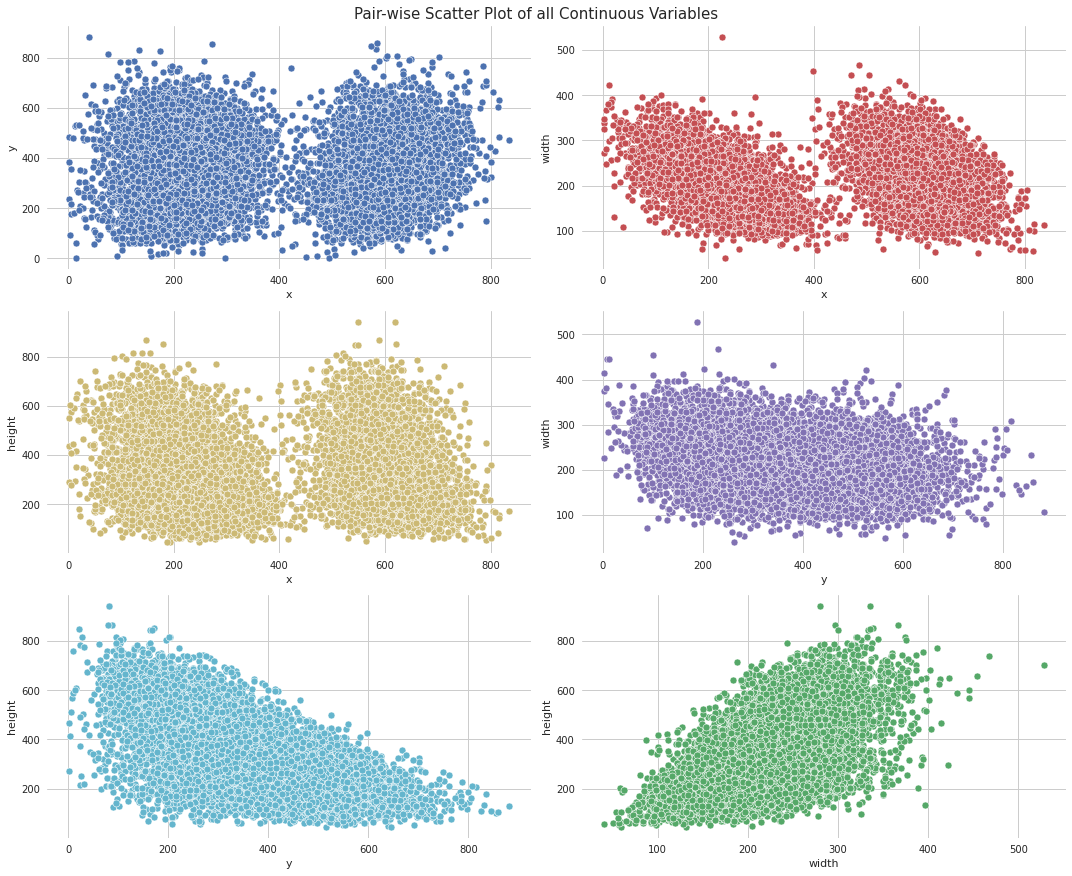

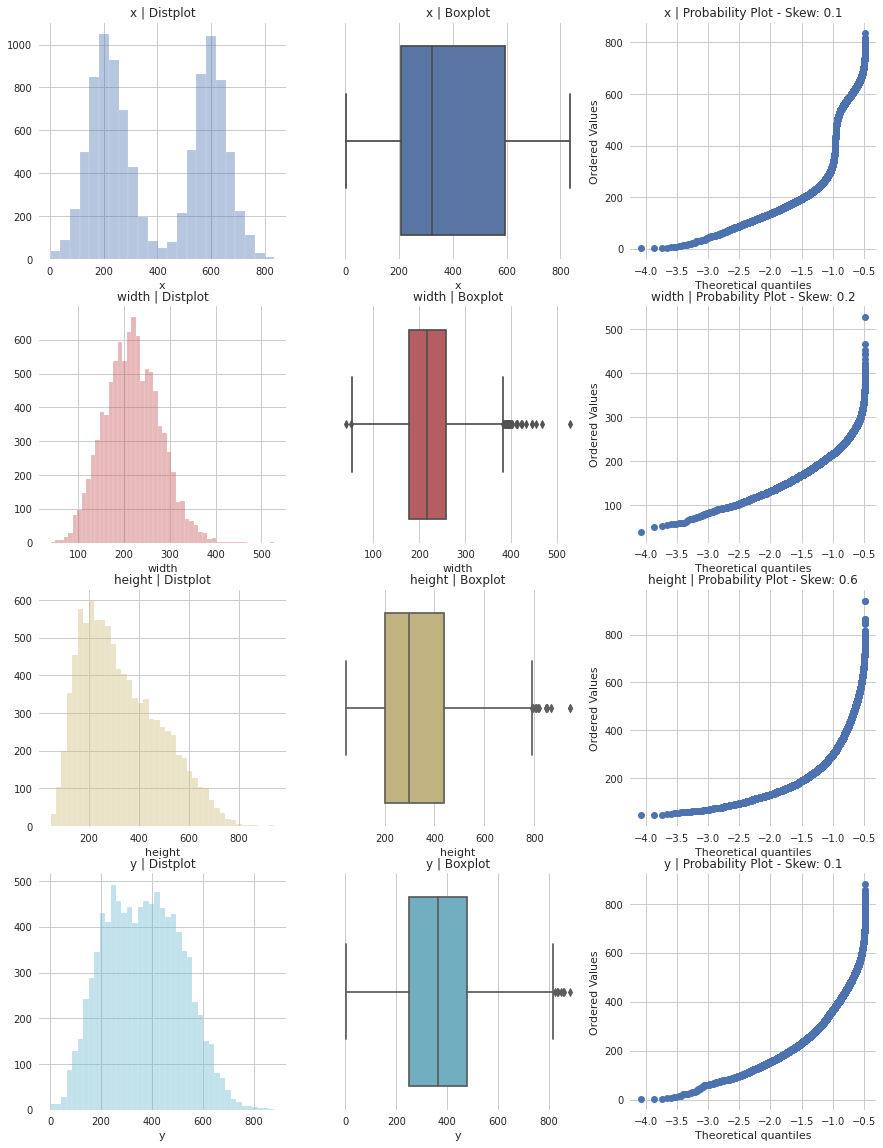

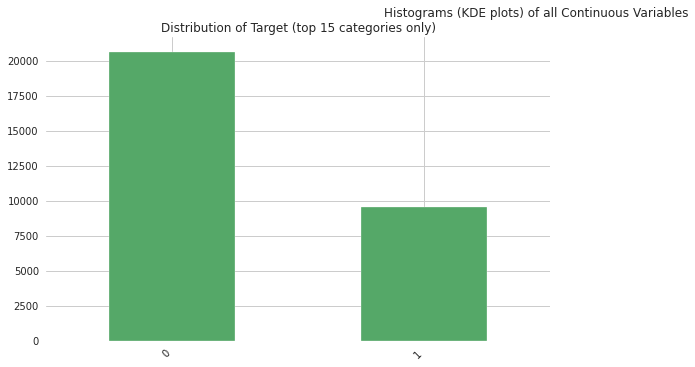

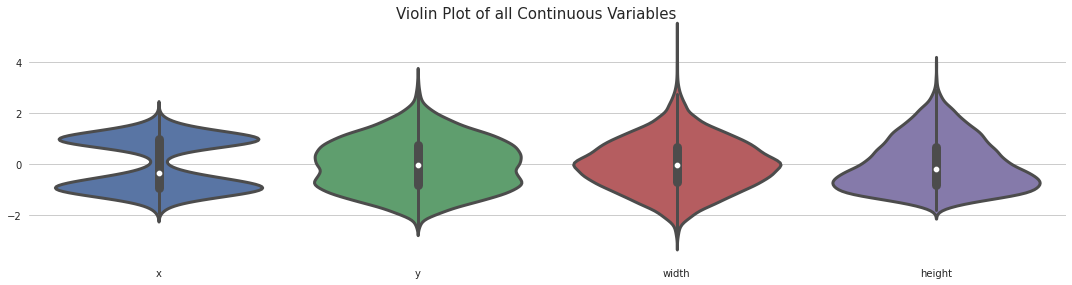

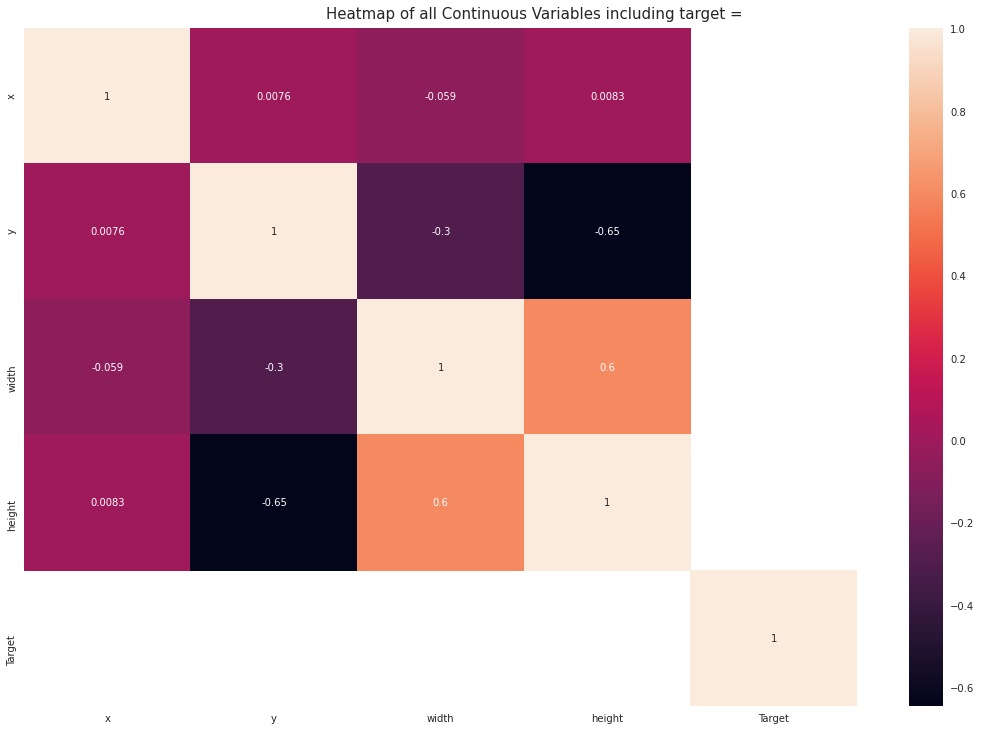

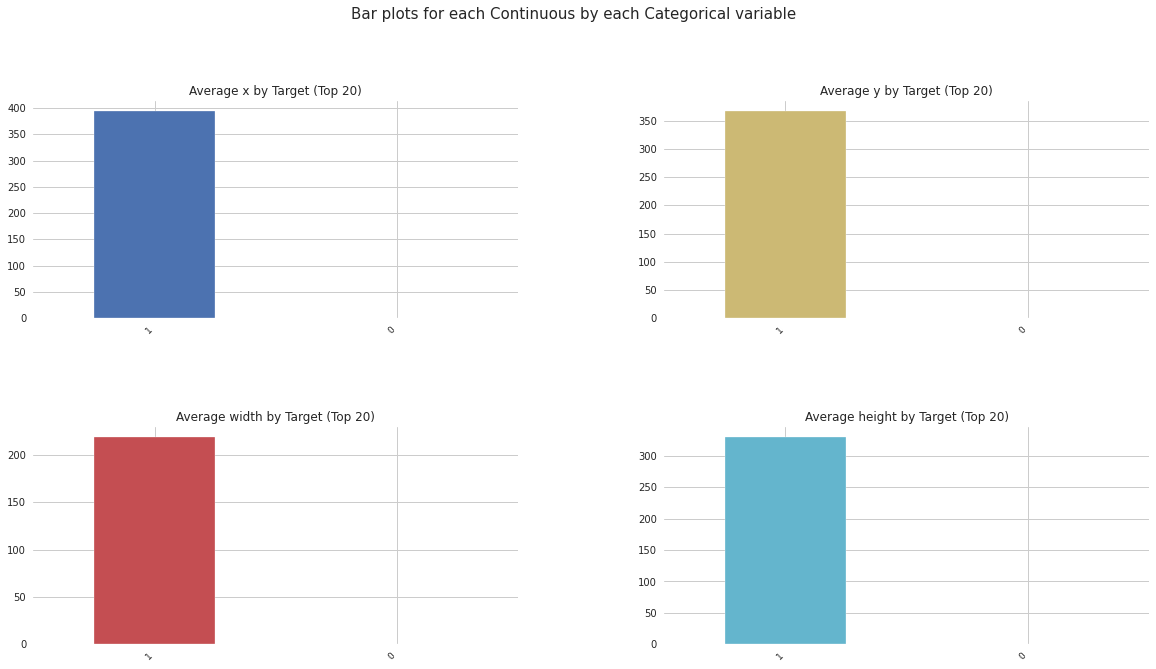

Time to run AutoViz (in seconds) = 8.893

 ###################### VISUALIZATION Completed ########################


,x,y,width,height,Target
0,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...
30222,185.0,298.0,228.0,379.0,1
30223,NaN,NaN,NaN,NaN,0
30224,NaN,NaN,NaN,NaN,0
30225,570.0,393.0,261.0,345.0,1


In [76]:
AV = AutoViz_Class()

AV.AutoViz('stage_2_train_labels.csv')

# **3. Model Building**

## **3.1 Data split, Defining Batch generator, Defining Iou, Augmentation, Print Results**

In [77]:
!cp '/gdrive/My Drive/Colab Notebooks/Projects/stage_2_train_jpeg_images.zip' .
!unzip -q stage_2_train_jpeg_images.zip

In [78]:
# To reduce the complexity and computing ties we will reduce the image size to 128 as of now
image_size = 128
image_depth = 3
image_path = 'stage_2_train_jpeg_images'

In [79]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

train_seq = iaa.Sequential([    
    #horizontal flips 50% of the time
    iaa.Fliplr(0.5),
    #Resize all images to a specific size    
    iaa.Resize({"height": image_size, "width": image_size}),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    # change brightness, DOES NOT AFFECT BBs
    iaa.Multiply((1.2, 1.5), per_channel=0.2),
    # translate by 40/60px on x/y axis
    # Rotate between 25 and -25 degrees
    # THIS AFFECTs BBs
    sometimes(iaa.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-35, 35),
    ))
])

In [80]:
test_seq = iaa.Sequential([    
    #Resize all images to a specific size    
    iaa.Resize({"height": image_size, "width": image_size})
])

In [81]:
#Augmentation function to apply on a batch
def apply_aug(images, bboxes, aug_seq):
    
    #Number of images to process
    img_count = len(images)
    
    #Make sequence deterministic
    seq_det = aug_seq.to_deterministic()
    
    #Initialize boxes for all images
    boxes = []
    
    for i in range(img_count):
        
        b_box = ia.BoundingBox(x1 = bboxes[i][0],
                               y1 = bboxes[i][1],
                               x2 = bboxes[i][2],
                               y2 = bboxes[i][3])
        
        boxes.append(ia.BoundingBoxesOnImage([b_box], shape=images[i].shape))
    
    #Perform image and BBs augmentation
    image_aug = seq_det.augment_images(images)
    bbs_aug = seq_det.augment_bounding_boxes(boxes)
    
    b_images = np.zeros((img_count,image_size, image_size,image_depth))
    b_bboxes = np.zeros((img_count, 4))
    
    for i in range(img_count):
        b_images[i] = image_aug[i]
        box_new = bbs_aug[i].bounding_boxes[0]
        b_bboxes[i] = [box_new.x1,
                       box_new.y1, 
                       box_new.x2 - box_new.x1,
                       box_new.y2- box_new.y1]
    return b_images, b_bboxes

In [82]:
#Split data between train and validation set
#Get information on all images
all_images = train_df_new['patientId'].unique()
all_images.shape

(26684,)

In [83]:
#80% of the data will be used for training
mask = np.random.rand(all_images.shape[0]) < 0.8

#Get Training and Test images
train_images = all_images[mask]
test_images = all_images[~mask] 

train_images

array(['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
       '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
       '00322d4d-1c29-4943-afc9-b6754be640eb', ...,
       'c1edf42b-5958-47ff-a1e7-4f23d99583ba',
       'c1f6b555-2eb1-4231-98f6-50a963976431',
       'c1f7889a-9ea9-4acb-b64c-b737c929599a'], dtype=object)

In [84]:
#Check number of images in training and test
train_images.shape, test_images.shape

((21349,), (5335,))

In [85]:
#Split dataframe between training and test
train_final = train_df_new[train_df_new['patientId'].isin(train_images)]
test_final = train_df_new[train_df_new['patientId'].isin(test_images)]
 
train_final = train_final.reset_index(drop=True)
test_final = test_final.reset_index(drop=True)

In [86]:
train_final

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,363.333333,152.0,227.333333,403.666667,0
4,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,363.333333,152.0,227.333333,403.666667,0
...,...,...,...,...,...,...,...
30176,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,363.333333,152.0,227.333333,403.666667,0
30177,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.000000,393.0,261.000000,345.000000,1
30178,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.000000,393.0,261.000000,345.000000,1
30179,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,233.000000,424.0,201.000000,356.000000,1


In [87]:
def image_batch_generator(df, batch_size=64):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, image_size, image_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):
            #Read image and resize
            img = tf.keras.preprocessing.image.load_img("stage_2_train_jpeg_images" + '/' + df.loc[image_nums[i], 'patientId'] +'.png', 
                                                        target_size=(image_size, image_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Target']
            #cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'width']
            img_height = df.loc[image_nums[i], 'height']
            
            xmin = df.loc[image_nums[i], 'x'] / (1024/image_size)
            xmax = (xmin + img_width) / (1024/image_size)

            ymin = df.loc[image_nums[i], 'y'] / (1024/image_size)
            ymax = (ymin + img_height) / (1024/image_size)

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/image_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [88]:
def image_batch_generator_dicom(df, batch_size=64, train_mode=True):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, image_size, image_size, 1))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        #List to hold all images which will be augmented
        all_images = []

        for i in range(batch_size):
         
            ds = dcm.dcmread("stage_2_train_images" + '/' + df.loc[image_nums[i], 'patientId'] +'.dcm')
            
            img_array = cv2.resize(ds.pixel_array,(image_size,image_size))
            img_array = img_array.reshape(image_size,image_size, 1)
            #Update batch
            batch_images[i] = img_array
            all_images.append(img_array)
            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Target']
            #cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=2)
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'width']
            img_height = df.loc[image_nums[i], 'height']
            
            xmin = df.loc[image_nums[i], 'x'] * image_size/img_width
            xmax = (xmin + img_width) * image_size/img_width

            ymin = df.loc[image_nums[i], 'y'] * image_size/img_height
            ymax = (ymin + img_height) * image_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax, ymax]
        
        #Apply augmentation
        if(train_mode):
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, train_seq)
        else:
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, test_seq)

        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/image_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [89]:
def image_batch_generator_aug(df, batch_size=64, train_mode=True):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, image_size, image_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        #List to hold all images which will be augmented
        all_images = []

        for i in range(batch_size):
            #Read image and resize
            img = tf.keras.preprocessing.image.load_img("stage_2_train_jpeg_images" + '/' + df.loc[image_nums[i], 'patientId'] +'.png', 
                                                       target_size=(image_size, image_size, 3))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)            
            #ds = dicom.dcmread(image_path + '/' + df.loc[i, 'patientId']+'.dcm')
            #img_array = cv2.resize(ds.pixel_array,(64,64))
            #img_array = img_array.reshape(64,64,1)
            #Update batch
            #batch_images[i] = img_array
            all_images.append(img_array)
            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Target']
            #cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=2)
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'width']
            img_height = df.loc[image_nums[i], 'height']
            
            xmin = df.loc[image_nums[i], 'x'] / (1024/image_size)
            xmax = (xmin + img_width) / (1024/image_size)

            ymin = df.loc[image_nums[i], 'y'] / (1024/image_size)
            ymax = (ymin + img_height) / (1024/image_size)
            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax, ymax]
        
        #Apply augmentation
        if(train_mode):
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, train_seq)
        else:
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, test_seq)

        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/image_size
        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [90]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

### **Print Model Results**
Creates a dataframe of result of all the models build from here on.
call **def add_data_to_results()** to add the results


In [125]:
Result = {'Model':[],
        'Classification_Accuracy':[], 'Regression_IoU': []}

In [126]:
Result_df = pd.DataFrame(Result)

In [127]:
def add_data_to_results(model, class_accuracy, iou):
  df2 = {'Model':model,
        'Classification_Accuracy':class_accuracy, 'Regression_IoU': iou}
  global Result_df
  Result_df = Result_df.append(df2, ignore_index = True)

## **3.2 Build VGG CNN Model**

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()
#----------------------------------------------------------------
#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(image_size,image_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
#------------------------------------------------------------------------------
#128 filters

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#---------------------------------------------------------------------------

#Add Conv Layer

#normalize data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3),padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding ='same',activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#---------------------------------------------------------------------------

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

last_layer = model.output

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       7

In [ ]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [ ]:
#Non Sequential model as it has two different outputs
final_model_vgg = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
#Create train and test generator
#batchsize = 32
#Create train and test generator
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
X, y = next(train_generator)
print(X.shape)

(64, 128, 128, 3)


In [ ]:
final_model_vgg.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_vgg_aug.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [ ]:
final_model_vgg.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
final_model_vgg.fit(train_generator,
                epochs=100,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint)

Epoch 1/100
468/468 [==============================] - 101s 213ms/step - loss: 0.9423 - class_op_loss: 0.9196 - reg_op_loss: 0.0227 - class_op_accuracy: 0.7428 - reg_op_IoU: 0.0640 - val_loss: 0.6509 - val_class_op_loss: 0.6344 - val_reg_op_loss: 0.0165 - val_class_op_accuracy: 0.6880 - val_reg_op_IoU: 0.0582

Epoch 00001: val_class_op_accuracy improved from -inf to 0.68803, saving model to Pneumonia_detection_vgg_aug.h5
Epoch 2/100
468/468 [==============================] - 100s 213ms/step - loss: 0.5172 - class_op_loss: 0.4967 - reg_op_loss: 0.0205 - class_op_accuracy: 0.7697 - reg_op_IoU: 0.0672 - val_loss: 0.7094 - val_class_op_loss: 0.6800 - val_reg_op_loss: 0.0294 - val_class_op_accuracy: 0.5871 - val_reg_op_IoU: 0.0316

Epoch 00002: val_class_op_accuracy did not improve from 0.68803
Epoch 3/100
468/468 [==============================] - 99s 211ms/step - loss: 0.4958 - class_op_loss: 0.4758 - reg_op_loss: 0.0200 - class_op_accuracy: 0.7807 - reg_op_IoU: 0.0717 - val_loss: 0.5619 

KeyboardInterrupt: ignored

In [ ]:

final_model_vgg.save('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_manual_vgg16.h5')

In [128]:
add_data_to_results('VGG_3_2', 82.19, 0.31)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.19,0.31


## observations
1. The model has too many trainable weights due to many layers and might lead to more computations causing the execution delay,  and the weights will change based on our image size.
2. Initial model is slightly overfitting, where we can see the class accuracy is little high than the validation set accuracy.
3. But we can also see there is constant improvement in classification accuracy aswell as regression accuracy.
4. Running the model for onnly 10 epochs now, if we increase the epoch count then we may see more improvement.
5. We can later on incorporate image augmentation on the data set.


## **3.3 Simple CNN model**


In [ ]:
simpmodel = tf.keras.models.Sequential()
simpmodel.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(image_size,image_size,3)))
simpmodel.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu'))# hidden layer-1
simpmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel.add(tf.keras.layers.Dropout(0.5))
simpmodel.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) # hidden layer -2
simpmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel.add(tf.keras.layers.Dropout(0.3))
simpmodel.add(tf.keras.layers.Conv2D(128,(5,5),activation='relu'))# hidden layer -3
simpmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel.add(tf.keras.layers.Dropout(0.2))
simpmodel.add(tf.keras.layers.Flatten()) # flatten
simpmodel.add(tf.keras.layers.Dense(64,activation='relu'))# fully connected layer
simpmodel.add(tf.keras.layers.Dropout(0.3))
simpmodel.add(tf.keras.layers.Dense(100))
simpmodel.add(tf.keras.layers.BatchNormalization())
simpmodel.add(tf.keras.layers.Activation('relu'))
simpmodel.add(tf.keras.layers.Dense(1))
simpmodel.add(tf.keras.layers.Activation('relu'))
last_layer = simpmodel.output

In [ ]:
simpmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 57, 57, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)       

In [ ]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [ ]:
#Non Sequential model as it has two different outputs
simpmodel_final = tf.keras.models.Model(inputs=simpmodel.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_simple.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [ ]:
simpmodel_final.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
simpmodel_final.fit(train_generator,
                epochs=50,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint)

Epoch 1/50
468/468 [==============================] - 90s 192ms/step - loss: 0.4675 - class_op_loss: 0.4500 - reg_op_loss: 0.0175 - class_op_accuracy: 0.7952 - reg_op_IoU: 0.0778 - val_loss: 0.5912 - val_class_op_loss: 0.5774 - val_reg_op_loss: 0.0138 - val_class_op_accuracy: 0.7067 - val_reg_op_IoU: 0.0609

Epoch 00001: val_class_op_accuracy did not improve from 0.78617
Epoch 2/50
468/468 [==============================] - 91s 194ms/step - loss: 0.4632 - class_op_loss: 0.4458 - reg_op_loss: 0.0174 - class_op_accuracy: 0.7950 - reg_op_IoU: 0.0766 - val_loss: 0.5404 - val_class_op_loss: 0.5268 - val_reg_op_loss: 0.0136 - val_class_op_accuracy: 0.7585 - val_reg_op_IoU: 0.0581

Epoch 00002: val_class_op_accuracy did not improve from 0.78617
Epoch 3/50
468/468 [==============================] - 90s 192ms/step - loss: 0.4622 - class_op_loss: 0.4448 - reg_op_loss: 0.0174 - class_op_accuracy: 0.7980 - reg_op_IoU: 0.0777 - val_loss: 0.5335 - val_class_op_loss: 0.5197 - val_reg_op_loss: 0.0138 

In [ ]:

simpmodel_final.save('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_SimpleCNN.h5')

In [129]:
add_data_to_results('Simple_CNN_3_3', 80.961, 0.06)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06


## **3.4 Unet model**

In [ ]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# def bce_loss(y_true,y_pred):
#   return keras.losses.binary_crossentropy(y_true,y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

In [ ]:
def conv2d_block(input_tensor, n_filters):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # second layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

In [ ]:
def build_unet(input_img, n_filters=16, dropout=0.1):

    #ENCODER - DOWNSAMPLE the image - 128x128x3

    #First Block
    c1 = conv2d_block(input_img, n_filters*1) #128x128x16
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1) #64x64x16
    p1 = tf.keras.layers.Dropout(dropout)(p1) #64x64x16
    #output will be 64x64x16 for image size 128x128x1

    #Second Block
    c2 = conv2d_block(p1, n_filters*2) #64x64x32
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2) #32x32x32
    p2 = tf.keras.layers.Dropout(dropout)(p2)
    #output will be 32x32x32

    #Third Block
    c3 = conv2d_block(p2, n_filters*4) #32x32x64
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3) #16x16x64
    p3 = tf.keras.layers.Dropout(dropout)(p3)
    #output will be 16x16x64

    #Fourth Block
    c4 = conv2d_block(p3, n_filters*8) #16x16x128
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)
    p4 = tf.keras.layers.Dropout(dropout)(p4)
    ##output will be 8x8x128 

    #Fifth Block
    c5 = conv2d_block(p4, n_filters*16)
    #output will be 8x8x256

    #We now have output of Encoder

    #DECODER - UPSAMPLE the feature to generate mask

    #First Block - connected to fourth block on DOWNSAMPLE side
    u6 = tf.keras.layers.Conv2DTranspose(n_filters * 8, (3, 3), 
                                         strides = (2, 2), 
                                         padding = 'same')(c5) #16x16x128
    #Skip connection
    u6 = tf.keras.layers.concatenate([u6, c4]) #16x16x256
    u6 = tf.keras.layers.Dropout(dropout)(u6) 
    c6 = conv2d_block(u6, n_filters * 8) #16x16x128

    #Second Block - connected to third block on DOWNSAMPLE side
    u7 = tf.keras.layers.Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6) #32x32x64
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4)

    #Third Block - connected to second block on DOWNSAMPLE side
    u8 = tf.keras.layers.Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7) #64x64x32
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2) 

    #Fourth Block - connected to first block on DOWNSAMPLE side
    u9 = tf.keras.layers.Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8) #128x128x16
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1) #128 x 128 x 16
    x2 = tf.keras.layers.GlobalAveragePooling2D()(c9)
    #Build the Output layer
    #outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9) #128x128x2
    #Classification output
    label_output = tf.keras.layers.Dense(1, 
                                        activation='sigmoid', 
                                        name='class_op')(x2)

    #Regression
    bbox_output = tf.keras.layers.Dense(4, 
                                        activation='sigmoid',
                                        name='reg_op')(x2)
    #Build the model using different layers
    model = tf.keras.Model(inputs=[input_img], outputs=[label_output, bbox_output])
    return model

In [ ]:
#Clear out notebook session
tf.keras.backend.clear_session()

#Define input layer
input_img = tf.keras.layers.Input((image_size, image_size, 3), name='input_img')

#Build model
UNET_model = build_unet(input_img, dropout=.3)

#Compile model
UNET_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':0.97, 'class_op':1.03},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
UNET_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('Unet_v1.h5', save_best_only=True, monitor='val_class_op_accuracy', verbose=1)

In [ ]:
#Create train and test generator
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
UNET_model.fit(train_generator,
                epochs=50,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint)

Epoch 1/50
468/468 [==============================] - 86s 184ms/step - loss: 0.4709 - class_op_loss: 0.4407 - reg_op_loss: 0.0174 - class_op_accuracy: 0.7974 - reg_op_IoU: 0.0775 - val_loss: 0.4790 - val_class_op_loss: 0.4510 - val_reg_op_loss: 0.0149 - val_class_op_accuracy: 0.7862 - val_reg_op_IoU: 0.0592

Epoch 00001: val_class_op_accuracy improved from 0.63944 to 0.78624, saving model to Unet_v1.h5
Epoch 2/50
468/468 [==============================] - 85s 182ms/step - loss: 0.4576 - class_op_loss: 0.4280 - reg_op_loss: 0.0173 - class_op_accuracy: 0.8052 - reg_op_IoU: 0.0778 - val_loss: 0.4491 - val_class_op_loss: 0.4231 - val_reg_op_loss: 0.0137 - val_class_op_accuracy: 0.8054 - val_reg_op_IoU: 0.0625

Epoch 00002: val_class_op_accuracy improved from 0.78624 to 0.80541, saving model to Unet_v1.h5
Epoch 3/50
468/468 [==============================] - 85s 181ms/step - loss: 0.4500 - class_op_loss: 0.4207 - reg_op_loss: 0.0173 - class_op_accuracy: 0.8092 - reg_op_IoU: 0.0766 - val_los

In [ ]:

UNET_model.save('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_manual_UNET_V1.h5')

In [130]:
add_data_to_results('UNET_3_4', 82.42, 0.34)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34


## **3.5 Model building using Tensorflow object detection API**

In [ ]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 58313, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 58313 (delta 3), reused 5 (delta 0), pack-reused 58305
Receiving objects: 100% (58313/58313), 573.12 MiB | 31.64 MiB/s, done.
Resolving deltas: 100% (40529/40529), done.


In [ ]:
#Upgrade pip package
!pip install --upgrade pip

     |████████████████████████████████| 1.6MB 13.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
%%bash
cd models/research
# Compile protos.
protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
cp object_detection/packages/tf2/setup.py .
python -m pip install --use-feature=2020-resolver .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1658067 sha256=61fb0c717eb89130983c4a214a1e63bf064d153a26928a463211854f97d7c863
  Stored in directory: /tmp/pip-ephem-wheel-cache-0_2o_6h0/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=f478ec921d28518ea481c82d70ec85da257e8c1f52f6d2ba2f8cda9af77d26e1
  Stored in directory: /root/.cache/pip/wheels/bc/49/5f/fdb5b9d85055c478213e0158ac122b596816149a02d82e0ab1
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=08b80607e4be63fc3e19f960b679fb95393a883180bcf6f1cb40157a5a5bc024
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=21c71ac58d467c4fa96ed169a371b25f4a75884eeca61dfd9c19381

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#Check if Object Detection API is installed
!pip list | grep object-detection

object-detection              0.1


In [ ]:
df_tenflow_train = train_final.copy()
df_tenflow_test = test_final.copy()

In [ ]:
df_tenflow_train['Target'] = df_tenflow_train['Target']+1
df_tenflow_test['Target'] = df_tenflow_test['Target']+1

In [ ]:
# Dimensions of the bounding boxes also must be resized
df_tenflow_train['x'] = df_tenflow_train['x'] / 8
df_tenflow_train['y'] = df_tenflow_train['y'] / 8
df_tenflow_train['width'] = df_tenflow_train['width'] / 8
df_tenflow_train['height'] = df_tenflow_train['height'] / 8

df_tenflow_test['x'] = df_tenflow_test['x'] / 8
df_tenflow_test['y'] = df_tenflow_test['y'] / 8
df_tenflow_test['width'] = df_tenflow_test['width'] / 8
df_tenflow_test['height'] = df_tenflow_test['height'] / 8

In [ ]:
df_tenflow_train

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,45.416667,19.000,28.416667,50.458333,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,45.416667,19.000,28.416667,50.458333,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,45.416667,19.000,28.416667,50.458333,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,45.416667,19.000,28.416667,50.458333,1
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,33.000000,19.000,26.625000,47.375000,2
...,...,...,...,...,...,...,...
29987,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,45.416667,19.000,28.416667,50.458333,1
29988,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,71.250000,49.125,32.625000,43.125000,2
29989,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,71.250000,49.125,32.625000,43.125000,2
29990,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,29.125000,53.000,25.125000,44.500000,2


In [ ]:
#Create a dictionary of Label and Class. This will be useful for building our second input to Model training
label_class_dict = dict(zip(df_tenflow_train['Target'], df_tenflow_train['class']))
print(label_class_dict)

{1: 'Normal', 2: 'Lung Opacity'}


### Generate tfrecord from CSV
Tensorflow object detection API requires data in tfrecord format. This can be done using generate_tfrecord.py file.

In [ ]:
!cp '/gdrive/MyDrive/Colab Notebooks/Projects/generate_tfrecord.py' .

The script file requires 3 inputs

--csv_input= : where is csv file located which was prepared in previous step

--img_path= : where are the actual images stored

--output_path= : where the script can save the generated tfrecord file and what should be file name.
We will run script for training and test csv separately to create two tfrecord files.

In [ ]:
df_tenflow_train

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,45.416667,19.000,28.416667,50.458333,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,45.416667,19.000,28.416667,50.458333,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,45.416667,19.000,28.416667,50.458333,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,45.416667,19.000,28.416667,50.458333,1
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,33.000000,19.000,26.625000,47.375000,2
...,...,...,...,...,...,...,...
29987,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,45.416667,19.000,28.416667,50.458333,1
29988,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,71.250000,49.125,32.625000,43.125000,2
29989,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,71.250000,49.125,32.625000,43.125000,2
29990,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,29.125000,53.000,25.125000,44.500000,2


In [ ]:
# Replace the column names as per the format required for tf record generator script
df_tenflow_train.columns=['filename', 'class', 'xmin', 'ymin', 'width', 'height', 'label']

In [ ]:
df_tenflow_test.columns=['filename', 'class', 'xmin', 'ymin', 'width', 'height', 'label']

In [ ]:
# Add the xmax and ymax fields in the data frame
df_tenflow_train['xmax'] = df_tenflow_train['xmin']+df_tenflow_train['width']
df_tenflow_train['ymax'] = df_tenflow_train['ymin']+df_tenflow_train['height']

df_tenflow_test['xmax'] = df_tenflow_test['xmin']+df_tenflow_test['width']
df_tenflow_test['ymax'] = df_tenflow_test['ymin']+df_tenflow_test['height']

In [ ]:
# Our filenames does not have extension , so add extension of the pictures as they will be accessed in tfrecord script
df_tenflow_train['filename'] = df_tenflow_train['filename'] + '.png'

In [ ]:
df_tenflow_test['filename'] = df_tenflow_test['filename'] + '.png'

In [ ]:
df_tenflow_train.to_csv('df_tenflow_train.csv', index=False)
df_tenflow_test.to_csv('df_tenflow_test.csv',index=False)

In [ ]:
#generate tfrecord for training data
!python generate_tfrecord.py --csv_input=df_tenflow_train.csv  --img_path={image_path} --output_path=train.tfrecord

2021-07-05 06:33:07.506765: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/train.tfrecord


In [ ]:
#generate tfrecord for testing data
!python generate_tfrecord.py --csv_input=df_tenflow_test.csv  --img_path={image_path} --output_path=test.tfrecord

2021-07-05 06:33:30.105510: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/test.tfrecord


In [ ]:
#Download the model from zoo
!wget -q http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

In [ ]:
#Extract tar file content
!tar -xf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

In [ ]:
#Check the extracted folder
!ls -l ssd_mobilenet_v2_320x320_coco17_tpu-8

total 16
drwxr-x--- 2 345018 89939 4096 Jul 10  2020 checkpoint
-rw-r----- 1 345018 89939 4496 Jul 11  2020 pipeline.config
drwxr-x--- 3 345018 89939 4096 Jul 10  2020 saved_model


In [ ]:
#Check the extracted folder
!ls -l ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint

total 23924
-rw-r----- 1 345018 89939      166 Jul 10  2020 checkpoint
-rw-r----- 1 345018 89939 24484350 Jul 10  2020 ckpt-0.data-00000-of-00001
-rw-r----- 1 345018 89939     6121 Jul 10  2020 ckpt-0.index


### Create Label Mapping File


In [ ]:
#Dict which was created earlier will be used for building Label Mapping file
label_class_dict

{1: 'Normal', 2: 'Lung Opacity'}

In [ ]:
#Build a pbtxt label file using label and class name
#This is required by Object detection API
#You can prepare it manually as well.

pbtxt_file_txt = ''
for label in sorted(label_class_dict.keys()):
    
    pbtxt_file_txt += "item {\n  id: " + str(label) + "\n  name: '" +  label_class_dict[label] + "'\n}\n\n"

with open('label_map.txt','w') as pbfile:
    pbfile.write(pbtxt_file_txt)

In [ ]:
#Review the file content
!cat label_map.txt

item {
  id: 1
  name: 'Normal'
}

item {
  id: 2
  name: 'Lung Opacity'
}



### Download a pre-trained model

In [ ]:
#Download the model from zoo
#!wget -q http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz

In [ ]:
#Extract tar file content
#!tar -xf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

In [ ]:
#Check the extracted folder
#!ls -l ssd_mobilenet_v1_coco_2018_01_28

### Prepare Training configuration file

1. Change num_classes parameter to 2 (as we have 2 categories in our dataset)
2. For 'train_input_reader' change 'input_path' to filepath of train.record file.
3. For 'train_input_reader' change 'label_map_path' to filepath of rsna.pbtxt file.
4. Repeat above two steps for 'eval_input_reader'.
5. Change fine_tune_checkpoint to filepath where pre-trained model.ckpt file is available e.g ssd_mobilenet_v2_modified/model.ckpt
6. Change 'batch_size' accordingly to available memory.
7. Change 'num_steps' to indicate how long the training will done e.g. 200000. For demo purpose, we are keeping it to 20 so that we can finish training quickly.


In [ ]:
!cp '/gdrive/MyDrive/Colab Notebooks/Projects/ssd_mobilenet_v2_modified.config' .

In [ ]:
config_file = 'ssd_mobilenet_v2_modified.config'

In [ ]:
#Copy training file from 'models/research/object_detection' folder to current folder
!cp /content/models/research/object_detection/model_main_tf2.py .

###Start training 

- Please note that Object detection take long time to train. The training may take few days if run on single GPU machine (depending on num of steps indicated). Try to keep training the model till loss comes close to 1 (or goes below 1). The script takes 3 inputs

1. --train_dir=<folder_name> : where model will be saved periodically as training progresses
2. --pipeline_config_path=<config_file_path> :where is model training configuration file located.

In [ ]:
#Create a training folder to store model checkpoints/snapshots as training progresses
!mkdir training

In [ ]:
#Check training folder
!ls -l training

total 0


In [ ]:
!ls

 df_tenflow_test.csv
 df_tenflow_train.csv
'GCP Credits Request Link - RSNA.txt'
 generate_tfrecord.py
 label_map.txt
 model_main_tf2.py
 models
 Pneumonia_detection_simple.h5
 Pneumonia_detection_vgg_aug.h5
 rsna-pneumonia-detection-challenge.zip
 sample_data
 ssd_mobilenet_v2_320x320_coco17_tpu-8
 ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
 ssd_mobilenet_v2_modified.config
 stage_2_detailed_class_info.csv
 stage_2_sample_submission.csv
 stage_2_test_images
 stage_2_train_images
 stage_2_train_jpeg_images
 stage_2_train_jpeg_images.zip
 stage_2_train_labels.csv
 test.tfrecord
 training
 train.tfrecord


###Start Tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
!kill 3463

/bin/bash: line 0: kill: (3463) - No such process


In [ ]:
#%tensorboard --logdir training

In [ ]:
#start training
!python model_main_tf2.py --model_dir=training/ --pipeline_config_path={config_file} --checkpoint_every_n=100 --alsologtostderr

2021-07-05 06:33:44.765688: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-05 06:33:47.266105: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-05 06:33:47.281683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-05 06:33:47.282171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-07-05 06:33:47.282205: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-05 06:33:47.311371: I tensorflow/stream_executor/plat

In [ ]:
#start training
#!python train.py --train_dir=training/ --pipeline_config_path={config_file} --logtostderr

In [ ]:
!ls

 df_tenflow_test.csv
 df_tenflow_train.csv
'GCP Credits Request Link - RSNA.txt'
 generate_tfrecord.py
 label_map.txt
 model_main_tf2.py
 models
 Pneumonia_detection_simple.h5
 Pneumonia_detection_vgg_aug.h5
 rsna-pneumonia-detection-challenge.zip
 sample_data
 ssd_mobilenet_v2_320x320_coco17_tpu-8
 ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
 ssd_mobilenet_v2_modified.config
 stage_2_detailed_class_info.csv
 stage_2_sample_submission.csv
 stage_2_test_images
 stage_2_train_images
 stage_2_train_jpeg_images
 stage_2_train_jpeg_images.zip
 stage_2_train_labels.csv
 test.tfrecord
 training
 train.tfrecord


###Model Evaluation

In [ ]:
#start Evaluation - THIS WILL KEEP RUNNING.
!python model_main_tf2.py --model_dir=training/ --pipeline_config_path={config_file} --checkpoint_dir=training/ --alsologtostderr 

2021-07-05 06:35:41.036556: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0705 06:35:43.016695 140033502783360 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0705 06:35:43.016885 140033502783360 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0705 06:35:43.016950 140033502783360 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0705 06:35:43.017024 140033502783360 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0705 06:35:43.017108 140033502783360 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-07-05 06:35:43.021074: I tensorflow/stream_executor/

#### Training and Evaluation in Background

If we want to evaluate our model on training data regularly, we have to run both training and evaluation script in parallel. Model evaluation on test data gets done everytime model checkpoint is saved during training.

In [ ]:
#Start training
!nohup /usr/bin/python3 model_main_tf2.py --model_dir=training/ --pipeline_config_path={config_file} --checkpoint_every_n=100 --alsologtostderr --eval_training_data --sample_1_of_n_eval_on_train_examples=10  > train.txt 2>&1 &

In [ ]:
!nohup /usr/bin/python3 model_main_tf2.py --model_dir=training/ --pipeline_config_path={config_file} --checkpoint_dir=training/ --alsologtostderr > eval.txt 2>&1 &

In [ ]:
!cat train.txt

2021-07-05 06:44:12.849342: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
!cat eval.txt

2021-07-05 06:44:13.363376: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
#Check the training folder
!ls -l training

total 54752
-rw-r--r-- 1 root root      254 Jul  5 06:35 checkpoint
-rw-r--r-- 1 root root 18714683 Jul  5 06:34 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 root root    22266 Jul  5 06:34 ckpt-1.index
-rw-r--r-- 1 root root 37261751 Jul  5 06:35 ckpt-2.data-00000-of-00001
-rw-r--r-- 1 root root    41646 Jul  5 06:35 ckpt-2.index
drwxr-xr-x 2 root root     4096 Jul  5 06:35 eval
drwxr-xr-x 2 root root     4096 Jul  5 06:34 train


### Export trained model

From the saved model checkpoints, we will create a frozen trained model. Frozen here means to remove model nodes which are no longer needed in prediction. This reduces model size.

In [ ]:
#Copy export_inference_graph.py file from models/research/object_detection to current directory
!cp /content/models/research/object_detection/exporter_main_v2.py .

In [ ]:
!ls -l

total 5061512
-rw-r--r-- 1 root   root      988820 Jul  5 06:33  df_tenflow_test.csv
-rw-r--r-- 1 root   root     3925091 Jul  5 06:33  df_tenflow_train.csv
-rw-r--r-- 1 root   root        5089 Jul  5 06:44  eval.txt
-rw-r--r-- 1 root   root        7605 Jul  5 06:44  exporter_main_v2.py
-rw-r--r-- 1 root   root          55 Dec 11  2019 'GCP Credits Request Link - RSNA.txt'
-rw------- 1 root   root        4465 Jul  5 06:33  generate_tfrecord.py
-rw-r--r-- 1 root   root          76 Jul  5 06:33  label_map.txt
-rw-r--r-- 1 root   root        4937 Jul  5 06:33  model_main_tf2.py
drwxr-xr-x 8 root   root        4096 Jul  5 06:32  models
-rw-r--r-- 1 root   root    18660808 Jul  5 06:01  Pneumonia_detection_simple.h5
-rw-r--r-- 1 root   root   605140176 Jul  5 04:08  Pneumonia_detection_vgg_aug.h5
-rw-r--r-- 1 root   root  3932287530 Jul  5 01:33  rsna-pneumonia-detection-challenge.zip
drwxr-xr-x 1 root   root        4096 Jun 15 13:37  sample_data
drwxr-x--- 4 345018 89939       4096 Jul 11 

The export_inference_graph.py script file requires the following input:

1. --input_type <input_node_name> : This will be used during prediction to set model input
2. --pipeline_config_path <model_training_config_file_path> : where is model training config file located.
3. --trained_checkpoint_prefix <file_path__model_checkpoint> : Which checkpoint should be used to create final model.
4. --output_directory <frozen_model_directory> : where should the frozen model created by script should be stored.

In [ ]:
#Provide input name, config file location, training folder
!python exporter_main_v2.py --input_type "image_tensor" --pipeline_config_path {config_file} --trained_checkpoint_dir training/ --output_directory detection_model

2021-07-05 06:44:17.100699: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-05 06:44:19.762267: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-05 06:44:19.773150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-05 06:44:19.773767: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-07-05 06:44:19.773823: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-05 06:44:19.777559: I tensorflow/stream_executor/plat

In [ ]:
#Check if model is saved in current directory
!ls -l detection_model

total 16
drwxr-xr-x 2 root root 4096 Jul  5 06:44 checkpoint
-rw-r--r-- 1 root root 4203 Jul  5 06:45 pipeline.config
drwxr-xr-x 4 root root 4096 Jul  5 06:45 saved_model


In [ ]:
#Check if model is saved in current directory
!ls -l detection_model/saved_model

total 9884
drwxr-xr-x 2 root root     4096 Jul  5 06:45 assets
-rw-r--r-- 1 root root 10110095 Jul  5 06:45 saved_model.pb
drwxr-xr-x 2 root root     4096 Jul  5 06:45 variables


In [ ]:
!ls -l detection_model/saved_model/variables/

total 18376
-rw-r--r-- 1 root root 18792474 Jul  5 06:45 variables.data-00000-of-00001
-rw-r--r-- 1 root root    19057 Jul  5 06:45 variables.index


In [ ]:
!ls -l detection_model/saved_model/assets

total 0


In [ ]:
#Check the training folder
!ls -l training

total 54752
-rw-r--r-- 1 root root      254 Jul  5 06:35 checkpoint
-rw-r--r-- 1 root root 18714683 Jul  5 06:34 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 root root    22266 Jul  5 06:34 ckpt-1.index
-rw-r--r-- 1 root root 37261751 Jul  5 06:35 ckpt-2.data-00000-of-00001
-rw-r--r-- 1 root root    41646 Jul  5 06:35 ckpt-2.index
drwxr-xr-x 2 root root     4096 Jul  5 06:44 eval
drwxr-xr-x 2 root root     4096 Jul  5 06:44 train


In [ ]:
!cp -r detection_model '/gdrive/MyDrive/Colab Notebooks/Projects/Tensor_flow_api/'

In [ ]:
#Save label dictionary as well for model prediction

In [ ]:
import pickle

label_file_path = '/gdrive/MyDrive/Colab Notebooks/Projects/Tensor_flow_api/pneumonia_label.pkl'

with open(label_file_path,'wb') as file:
    pickle.dump(label_class_dict, file)

### Model Prediction

Load Saved model

In [ ]:
saved_model_path = 'detection_model/saved_model'
model = tf.saved_model.load(saved_model_path)

Function to get model prediction

In [ ]:
#Function to get predictions from a Detection model
def detector_prediction(image_file, confidence_threshold=0.5):

    """
    image_file: File path of the image for which prediction needs to be done
    confidence_threshold: Minimum confidence/probability for prediction to be considered
    """
    #Load image
    img = tf.keras.preprocessing.image.load_img(image_file)
    
    #Convert to numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')
    #Make it a batch of one example
    img_array = tf.expand_dims(img_array, axis=0)

    #Prediction
    output = model(img_array) #get list of tensors discussed above as output
    #print(output)
    detection_scores = output['detection_scores'].numpy()[0] #get detection scores
    detection_classes = output['detection_classes'].numpy()[0]
    detection_boxes = output['detection_boxes'].numpy()[0]

    #Select predictions for which probability is higher than confidence_threshold
    selected_predictions = detection_scores >= confidence_threshold

    selected_prediction_scores = detection_scores[selected_predictions]
    selected_prediction_classes = detection_classes[selected_predictions]
    selected_prediction_boxes = detection_boxes[selected_predictions]

    #De-normalize box co-ordinates (multiply x-coordinates by image width and y-coords by image height)
    img_w, img_h = img.size

    for i in range(selected_prediction_boxes.shape[0]):
        
        selected_prediction_boxes[i,0] *= img_h #ymin * img_w
        selected_prediction_boxes[i,1] *= img_w #xmin * img_h
        selected_prediction_boxes[i,2] *= img_h #ymax * img_w
        selected_prediction_boxes[i,3] *= img_w #xmax * img_h

    #Make all co-ordinates as integer
    selected_prediction_boxes= selected_prediction_boxes.astype(int)

    #Convert class indexes to actual class labels
    predicted_classes = []
    for i in range(selected_prediction_classes.shape[0]):
        predicted_classes.append(label_class_dict[int(selected_prediction_classes[i])])

    #Number of predictions
    selected_num_predictions = selected_prediction_boxes.shape[0]

    return {'Total Predictions': selected_num_predictions,
            'Scores': selected_prediction_scores, 
            'Classes': predicted_classes, 
            'Box coordinates': selected_prediction_boxes}

Visualize model output

In [ ]:
def visualize_output(image_file, confidence_threshold=0.5):

    #Call model prediction function above
    output = detector_prediction(image_file, confidence_threshold=confidence_threshold)

    #Read image
    img = cv2.imread(image_file)

    #Draw rectangle for predicted boxes, also add predicted classes
    for i in range(output['Box coordinates'].shape[0]):

        box = output['Box coordinates'][i]
        
        #Draw rectangle - (ymin, xmin, ymax, xmax)
        img = cv2.rectangle(img, (box[1], box[0]), (box[3], box[2]), (0,255,0), 2)
        
        #Add Label - Class name and confidence level
        
        label = output['Classes'][i] + ': ' + str(round(output['Scores'][i],2))

        print(label)
        img = cv2.putText(img, label, (box[1], box[0]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    #Conver BGR image to RGB to use with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Display image
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.show()

Lung Opacity: 0.72


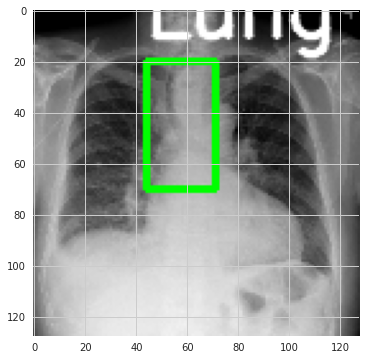

In [ ]:
#Model output
image_num = np.random.randint(0, test_final.shape[0])
#Visualize on image
visualize_output("stage_2_train_jpeg_images" + '/' + test_final.loc[image_num, 'patientId'] +'.png', confidence_threshold=0.7)

# **4 Hyper Parameter Tuning**

## **4.1 Building Simple CNN Model (RMSProp Optimizer)**

In [ ]:
simpmodel_rms = tf.keras.models.Sequential()
simpmodel_rms.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(image_size,image_size,3)))

# Hidden Layer -1
simpmodel_rms.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) 
simpmodel_rms.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel_rms.add(tf.keras.layers.Dropout(0.5))    # Dropout Layer

# Hidden Layer -2
simpmodel_rms.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) 
simpmodel_rms.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel_rms.add(tf.keras.layers.Dropout(0.3))    # Dropout Layer

# Hidden Layer -3
simpmodel_rms.add(tf.keras.layers.Conv2D(128,(5,5),activation='relu'))
simpmodel_rms.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel_rms.add(tf.keras.layers.Dropout(0.2))    # Dropout Layer
simpmodel_rms.add(tf.keras.layers.Flatten())       # Flatten

# Fully Connected Layer
simpmodel_rms.add(tf.keras.layers.Dense(64,activation='relu'))
simpmodel.add(tf.keras.layers.Dropout(0.3))    # Dropout Layer
simpmodel_rms.add(tf.keras.layers.Dense(100))
simpmodel_rms.add(tf.keras.layers.BatchNormalization())
simpmodel_rms.add(tf.keras.layers.Activation('relu'))
simpmodel_rms.add(tf.keras.layers.Dense(1))
simpmodel_rms.add(tf.keras.layers.Activation('relu'))
last_layer = simpmodel_rms.output

In [ ]:
simpmodel_rms.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 57, 57, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 64)        0

In [ ]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [ ]:
#Non Sequential model as it has two different outputs
simpmodel_rms_final = tf.keras.models.Model(inputs=simpmodel_rms.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint_rms=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_simple.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    patience = 0.01,
                                                    verbose=1)

In [ ]:
simpmodel_rms_final.compile(optimizer='rmsprop', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
simpmodel_rms_final.fit(train_generator,
                epochs=50,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint_rms)

Epoch 1/50
468/468 [==============================] - 83s 179ms/step - loss: 0.6211 - class_op_loss: 0.5597 - reg_op_loss: 0.0614 - class_op_accuracy: 0.7457 - reg_op_IoU: 0.0426 - val_loss: 0.5750 - val_class_op_loss: 0.5335 - val_reg_op_loss: 0.0415 - val_class_op_accuracy: 0.7790 - val_reg_op_IoU: 0.0431

Epoch 00001: val_class_op_accuracy improved from -inf to 0.77902, saving model to Pneumonia_detection_simple.h5
Epoch 2/50
468/468 [==============================] - 84s 181ms/step - loss: 0.5543 - class_op_loss: 0.5296 - reg_op_loss: 0.0247 - class_op_accuracy: 0.7600 - reg_op_IoU: 0.0956 - val_loss: 0.5320 - val_class_op_loss: 0.5171 - val_reg_op_loss: 0.0149 - val_class_op_accuracy: 0.7701 - val_reg_op_IoU: 0.0583

Epoch 00002: val_class_op_accuracy did not improve from 0.77902
Epoch 3/50
468/468 [==============================] - 84s 181ms/step - loss: 0.5283 - class_op_loss: 0.5107 - reg_op_loss: 0.0176 - class_op_accuracy: 0.7636 - reg_op_IoU: 0.0787 - val_loss: 0.5631 - val_

In [131]:
add_data_to_results('Simple_CNN_RmsProp_4_1', 81.145, 0.06)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06


## **4.2 Building Simple CNN Model (SGD Optimizer)**

In [ ]:
simpmodel_sgd = tf.keras.models.Sequential()
simpmodel_sgd.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(image_size,image_size,3)))

# Hidden Layer -1
simpmodel_sgd.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) 
simpmodel_sgd.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel_sgd.add(tf.keras.layers.Dropout(0.5))    # Dropout Layer

# Hidden Layer -2
simpmodel_sgd.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) 
simpmodel_sgd.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel_sgd.add(tf.keras.layers.Dropout(0.3))    # Dropout Layer

# Hidden Layer -3
simpmodel_sgd.add(tf.keras.layers.Conv2D(128,(5,5),activation='relu'))
simpmodel_sgd.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel_sgd.add(tf.keras.layers.Dropout(0.2))    # Dropout Layer
simpmodel_sgd.add(tf.keras.layers.Flatten())       # Flatten

# Fully Connected Layer
simpmodel_sgd.add(tf.keras.layers.Dense(64,activation='relu'))
simpmodel_sgd.add(tf.keras.layers.Dropout(0.3))    # Dropout Layer
simpmodel_sgd.add(tf.keras.layers.Dense(100))
simpmodel_sgd.add(tf.keras.layers.BatchNormalization())
simpmodel_sgd.add(tf.keras.layers.Activation('relu'))
simpmodel_sgd.add(tf.keras.layers.Dense(1))
simpmodel_sgd.add(tf.keras.layers.Activation('relu'))
last_layer = simpmodel_sgd.output

In [ ]:
simpmodel_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 57, 57, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 64)       

In [ ]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [ ]:
#Non Sequential model as it has two different outputs
simpmodel_sgd_final = tf.keras.models.Model(inputs=simpmodel_sgd.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint_sgd=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_simple.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    patience = 0.01,
                                                    verbose=1)

In [ ]:
simpmodel_sgd_final.compile(optimizer='sgd', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
simpmodel_sgd_final.fit(train_generator,
                epochs=50,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint_rms)

Epoch 1/50
468/468 [==============================] - 84s 177ms/step - loss: 0.7271 - class_op_loss: 0.6453 - reg_op_loss: 0.0818 - class_op_accuracy: 0.6129 - reg_op_IoU: 0.0121 - val_loss: 0.7492 - val_class_op_loss: 0.6714 - val_reg_op_loss: 0.0778 - val_class_op_accuracy: 0.6422 - val_reg_op_IoU: 0.0034

Epoch 00001: val_class_op_accuracy did not improve from 0.81237
Epoch 2/50
468/468 [==============================] - 82s 175ms/step - loss: 0.6800 - class_op_loss: 0.6121 - reg_op_loss: 0.0679 - class_op_accuracy: 0.6756 - reg_op_IoU: 0.0205 - val_loss: 0.7623 - val_class_op_loss: 0.6985 - val_reg_op_loss: 0.0638 - val_class_op_accuracy: 0.4798 - val_reg_op_IoU: 0.0058

Epoch 00002: val_class_op_accuracy did not improve from 0.81237
Epoch 3/50
468/468 [==============================] - 82s 175ms/step - loss: 0.6520 - class_op_loss: 0.5957 - reg_op_loss: 0.0564 - class_op_accuracy: 0.6905 - reg_op_IoU: 0.0282 - val_loss: 0.7699 - val_class_op_loss: 0.7159 - val_reg_op_loss: 0.0540 

In [132]:
add_data_to_results('Simple_CNN_SGD_4_2', 77.70, 0.06)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06


## **4.3 VGG model (Activation = leaky_relu , dropout = 0.4, all layers)**

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
vgg_model_1 = tf.keras.models.Sequential()
#----------------------------------------------------------------
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization(input_shape=(image_size,image_size,3,)))

#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())


#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#Add Max Pool layer
vgg_model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))


#------------------------------------------------------------------------------
#128 filters

#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#Add Max Pool layer
vgg_model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#---------------------------------------------------------------------------

#Add Conv Layer

#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())

vgg_model_1.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3),padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding ='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())

#Add Max Pool layer
vgg_model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#---------------------------------------------------------------------------

#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())

#Add Max Pool layer
vgg_model_1.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))


#---------------------------------------------------------------------------

#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())

#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#normalize data
vgg_model_1.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
vgg_model_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same'))
vgg_model_1.add(tf.keras.layers.LeakyReLU())

#Add Max Pool layer
vgg_model_1.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------
vgg_model_1.add(tf.keras.layers.Flatten())

vgg_model_1.add(tf.keras.layers.Dense(4096))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#Add Dropout
vgg_model_1.add(tf.keras.layers.Dropout(0.4))
vgg_model_1.add(tf.keras.layers.Dense(4096))
vgg_model_1.add(tf.keras.layers.LeakyReLU())
#Add Dropout
vgg_model_1.add(tf.keras.layers.Dropout(0.4))

last_layer = vgg_model_1.output

In [ ]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [ ]:
#Non Sequential model as it has two different outputs
vgg_4_3 = tf.keras.models.Model(inputs=vgg_model_1.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator_aug(train_final) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final)

In [ ]:
vgg_4_3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 64) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint_vgg1=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_vgg1_aug.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [ ]:
vgg_4_3.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
vgg_4_3.fit(train_generator,
                initial_epoch = 15,
                epochs=20,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint_vgg1)

Epoch 16/20
468/468 [==============================] - 115s 246ms/step - loss: 1.3928 - class_op_loss: 1.2976 - reg_op_loss: 0.0952 - class_op_accuracy: 0.6256 - reg_op_IoU: nan - val_loss: 0.8432 - val_class_op_loss: 0.7491 - val_reg_op_loss: 0.0941 - val_class_op_accuracy: 0.7123 - val_reg_op_IoU: 0.0000e+00

Epoch 00016: val_class_op_accuracy did not improve from 0.76234
Epoch 17/20
468/468 [==============================] - 154s 329ms/step - loss: 1.8711 - class_op_loss: 1.7760 - reg_op_loss: 0.0951 - class_op_accuracy: 0.6120 - reg_op_IoU: nan - val_loss: 1.1136 - val_class_op_loss: 1.0195 - val_reg_op_loss: 0.0940 - val_class_op_accuracy: 0.6627 - val_reg_op_IoU: nan

Epoch 00017: val_class_op_accuracy did not improve from 0.76234
Epoch 18/20
468/468 [==============================] - 114s 244ms/step - loss: 0.9578 - class_op_loss: 0.8623 - reg_op_loss: 0.0955 - class_op_accuracy: 0.6528 - reg_op_IoU: nan - val_loss: 0.9162 - val_class_op_loss: 0.8233 - val_reg_op_loss: 0.0928 - 

In [133]:
add_data_to_results('VGG_LeakyRelu_4_3', 76.23, 'NaN')
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06
5,VGG_LeakyRelu_4_3,76.230,NaN


## **4.4 VGG model Removed dense layer at the end to reduce weights (remove batch normalization , dropout = 0.4 in last layer)**

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
vgg_model_2 = tf.keras.models.Sequential()
#----------------------------------------------------------------
#normalize data
vgg_model_2.add(tf.keras.layers.BatchNormalization(input_shape=(image_size,image_size,3,)))

#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same', activation= 'relu'))

#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Max Pool layer
vgg_model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

#------------------------------------------------------------------------------
#128 filters
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same',activation= 'relu'))

#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Max Pool layer
vgg_model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#---------------------------------------------------------------------------
vgg_model_2.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3),padding='same',activation= 'relu'))
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding ='same',activation= 'relu'))
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Max Pool layer
vgg_model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#---------------------------------------------------------------------------
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same',activation= 'relu'))
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same',activation= 'relu'))
#Add Max Pool layer
vgg_model_2.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))


#---------------------------------------------------------------------------
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Conv Layer
vgg_model_2.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation= 'relu'))
#Add Max Pool layer
vgg_model_2.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------
vgg_model_2.add(tf.keras.layers.Flatten())

last_layer = vgg_model_2.output

In [ ]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [ ]:
#Non Sequential model as it has two different outputs
vgg_4_4 = tf.keras.models.Model(inputs=vgg_model_2.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
vgg_4_4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint_vgg1=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_vgg2_aug.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [ ]:
vgg_4_4.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
vgg_4_4.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint_vgg1)

Epoch 1/10
468/468 [==============================] - 105s 222ms/step - loss: 0.7101 - class_op_loss: 0.6903 - reg_op_loss: 0.0198 - class_op_accuracy: 0.5556 - reg_op_IoU: 0.0700 - val_loss: 0.7103 - val_class_op_loss: 0.6957 - val_reg_op_loss: 0.0146 - val_class_op_accuracy: 0.5276 - val_reg_op_IoU: 0.0490

Epoch 00001: val_class_op_accuracy improved from -inf to 0.52757, saving model to Pneumonia_detection_vgg2_aug.h5
Epoch 2/10
468/468 [==============================] - 102s 219ms/step - loss: 0.7060 - class_op_loss: 0.6879 - reg_op_loss: 0.0181 - class_op_accuracy: 0.5535 - reg_op_IoU: 0.0709 - val_loss: 0.7028 - val_class_op_loss: 0.6891 - val_reg_op_loss: 0.0137 - val_class_op_accuracy: 0.5450 - val_reg_op_IoU: 0.0509

Epoch 00002: val_class_op_accuracy improved from 0.52757 to 0.54504, saving model to Pneumonia_detection_vgg2_aug.h5
Epoch 3/10
468/468 [==============================] - 104s 222ms/step - loss: 0.7056 - class_op_loss: 0.6877 - reg_op_loss: 0.0180 - class_op_accur

In [134]:
add_data_to_results('VGG_NoDense_4_4', 54.5 , 0.052)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06
5,VGG_LeakyRelu_4_3,76.230,NaN
6,VGG_NoDense_4_4,54.500,0.052


## **4.5 Unet model with additional dense layers at the end**

In [ ]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# def bce_loss(y_true,y_pred):
#   return keras.losses.binary_crossentropy(y_true,y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

In [ ]:
def conv2d_block(input_tensor, n_filters):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # second layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

In [ ]:
def build_unet(input_img, n_filters=16, dropout=0.1):

    #ENCODER - DOWNSAMPLE the image - 128x128x3

    #First Block
    c1 = conv2d_block(input_img, n_filters*1) #128x128x16
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1) #64x64x16
    p1 = tf.keras.layers.Dropout(dropout)(p1) #64x64x16
    #output will be 64x64x16 for image size 128x128x1

    #Second Block
    c2 = conv2d_block(p1, n_filters*2) #64x64x32
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2) #32x32x32
    p2 = tf.keras.layers.Dropout(dropout)(p2)
    #output will be 32x32x32

    #Third Block
    c3 = conv2d_block(p2, n_filters*4) #32x32x64
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3) #16x16x64
    p3 = tf.keras.layers.Dropout(dropout)(p3)
    #output will be 16x16x64

    #Fourth Block
    c4 = conv2d_block(p3, n_filters*8) #16x16x128
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)
    p4 = tf.keras.layers.Dropout(dropout)(p4)
    ##output will be 8x8x128 

    #Fifth Block
    c5 = conv2d_block(p4, n_filters*16)
    #output will be 8x8x256

    #We now have output of Encoder

    #DECODER - UPSAMPLE the feature to generate mask

    #First Block - connected to fourth block on DOWNSAMPLE side
    u6 = tf.keras.layers.Conv2DTranspose(n_filters * 8, (3, 3), 
                                         strides = (2, 2), 
                                         padding = 'same')(c5) #16x16x128
    #Skip connection
    u6 = tf.keras.layers.concatenate([u6, c4]) #16x16x256
    u6 = tf.keras.layers.Dropout(dropout)(u6) 
    c6 = conv2d_block(u6, n_filters * 8) #16x16x128

    #Second Block - connected to third block on DOWNSAMPLE side
    u7 = tf.keras.layers.Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6) #32x32x64
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4)

    #Third Block - connected to second block on DOWNSAMPLE side
    u8 = tf.keras.layers.Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7) #64x64x32
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2) 

    #Fourth Block - connected to first block on DOWNSAMPLE side
    u9 = tf.keras.layers.Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8) #128x128x16
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1) #128 x 128 x 16
    x2 = tf.keras.layers.GlobalAveragePooling2D()(c9)
    #Build the Output layer
    #outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9) #128x128x2
    x3 = tf.keras.layers.Flatten()(x2)

    x4 = tf.keras.layers.Dense(4096, activation='relu')(x3)
    #Add Dropout
    x5 = tf.keras.layers.Dropout(dropout)(x4)
    x6 = tf.keras.layers.Dense(4096, activation='relu')(x5)
    #Add Dropout
    x7= tf.keras.layers.Dropout(dropout)(x6)

    #Classification output
    label_output = tf.keras.layers.Dense(1, 
                                        activation='sigmoid', 
                                        name='class_op')(x7)

    #Regression
    bbox_output = tf.keras.layers.Dense(4, 
                                        activation='sigmoid',
                                        name='reg_op')(x7)
    #Build the model using different layers
    model = tf.keras.Model(inputs=[input_img], outputs=[label_output, bbox_output])
    return model

In [ ]:
#Clear out notebook session
tf.keras.backend.clear_session()

#Define input layer
input_img = tf.keras.layers.Input((image_size, image_size, 3), name='input_img')

#Build model
UNET_model_4_5 = build_unet(input_img, dropout=.3)

#Compile model
UNET_model_4_5.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':0.97, 'class_op':1.03},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
UNET_model_4_5.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('Unet_v1.h5', save_best_only=True, monitor='val_class_op_accuracy', verbose=1)

In [ ]:
#Create train and test generator
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [ ]:
UNET_model_4_5.fit(train_generator,
                epochs=20,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint)

Epoch 1/20
468/468 [==============================] - 96s 199ms/step - loss: 0.5649 - class_op_loss: 0.5307 - reg_op_loss: 0.0189 - class_op_accuracy: 0.7404 - reg_op_IoU: 0.0717 - val_loss: 0.5461 - val_class_op_loss: 0.5176 - val_reg_op_loss: 0.0133 - val_class_op_accuracy: 0.7704 - val_reg_op_IoU: 0.0516

Epoch 00001: val_class_op_accuracy improved from -inf to 0.77035, saving model to Unet_v1.h5
Epoch 2/20
468/468 [==============================] - 91s 195ms/step - loss: 0.5118 - class_op_loss: 0.4798 - reg_op_loss: 0.0181 - class_op_accuracy: 0.7752 - reg_op_IoU: 0.0717 - val_loss: 0.7970 - val_class_op_loss: 0.7621 - val_reg_op_loss: 0.0124 - val_class_op_accuracy: 0.6813 - val_reg_op_IoU: 0.0826

Epoch 00002: val_class_op_accuracy did not improve from 0.77035
Epoch 3/20
468/468 [==============================] - 93s 199ms/step - loss: 0.4907 - class_op_loss: 0.4594 - reg_op_loss: 0.0181 - class_op_accuracy: 0.7875 - reg_op_IoU: 0.0732 - val_loss: 0.5277 - val_class_op_loss: 0.50

In [ ]:

UNET_model_4_5.save('/gdrive/My Drive/Colab Notebooks/Projects/UNET_model_4_5.h5')


In [135]:
add_data_to_results('UNET_withDense_4_5', 81.959, 0.08)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06
5,VGG_LeakyRelu_4_3,76.230,NaN
6,VGG_NoDense_4_4,54.500,0.052
7,UNET_withDense_4_5,81.959,0.08


# **5. Transfer Learning**


## **5.1 ResNet model pretrained with ImageNet data**

In [94]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()
model.add(tf.keras.applications.ResNet50(input_shape= (image_size, image_size, 3), include_top=False, weights='imagenet'))
#----------------------------------------------------------------
model.add(tf.keras.layers.Flatten()) # flatten
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64,activation='relu'))# fully connected layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Activation('relu'))
last_layer = model.output

94773248/94765736 [==============================] - 1s 0us/step


In [95]:
model.layers

In [96]:
# Freeze the weights of ResNet model
model.layers[0].trainable = False

In [97]:
#Global average pool to reduce number of features and Flatten the output
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [98]:
#Non Sequential model as it has two different outputs
final_model_resnet = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [99]:
final_model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
resnet50_input (InputLayer)     [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
resnet50 (Functional)           (None, 4, 4, 2048)   23587712    resnet50_input[0][0]             
__________________________________________________________________________________________________
flatten (Flatten)               (None, 32768)        0           resnet50[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32768)        131072      flatten[0][0]                    
______________________________________________________________________________________________

In [100]:
#Create train and test generator
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [101]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_Resnet_aug.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [102]:
final_model_resnet.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':0.97, 'class_op':1.03},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [103]:
final_model_resnet.fit(train_generator,
                epochs=50,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint)

Epoch 1/50
471/471 [==============================] - 120s 213ms/step - loss: 0.5778 - class_op_loss: 0.5146 - reg_op_loss: 0.0492 - class_op_accuracy: 0.7596 - reg_op_IoU: 0.0440 - val_loss: 0.4726 - val_class_op_loss: 0.4401 - val_reg_op_loss: 0.0198 - val_class_op_accuracy: 0.7920 - val_reg_op_IoU: 0.0342

Epoch 00001: val_class_op_accuracy improved from -inf to 0.79203, saving model to Pneumonia_detection_Resnet_aug.h5
Epoch 2/50
471/471 [==============================] - 100s 212ms/step - loss: 0.5001 - class_op_loss: 0.4636 - reg_op_loss: 0.0234 - class_op_accuracy: 0.7885 - reg_op_IoU: 0.0519 - val_loss: 0.4613 - val_class_op_loss: 0.4332 - val_reg_op_loss: 0.0156 - val_class_op_accuracy: 0.8027 - val_reg_op_IoU: 0.0473

Epoch 00002: val_class_op_accuracy improved from 0.79203 to 0.80267, saving model to Pneumonia_detection_Resnet_aug.h5
Epoch 3/50
471/471 [==============================] - 101s 214ms/step - loss: 0.4770 - class_op_loss: 0.4438 - reg_op_loss: 0.0205 - class_op_a

In [104]:
final_model_resnet.save('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_manual_ResNet_TransferLern.h5')

In [136]:
add_data_to_results('Resnet_TL_5_1', 80.725, 0.219)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06
5,VGG_LeakyRelu_4_3,76.230,NaN
6,VGG_NoDense_4_4,54.500,0.052
7,UNET_withDense_4_5,81.959,0.08
8,Resnet_TL_5_1,80.725,0.219


## **Using Pretrained U-Net model**

In [106]:
dependencies = {
    'IoU': IoU
}

In [107]:
UnetModel_v1 = keras.models.load_model('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_manual_UNET_V1.h5', custom_objects=dependencies)

In [108]:
UnetModel_v1.layers

In [109]:
for layer in UnetModel_v1.layers:
  layer.trainable = False

In [110]:
UnetModel_v1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [111]:
#Clear out notebook session
tf.keras.backend.clear_session()
from keras.models import Model
#removing the output layer from the pretrained unet model
prev_model = keras.models.Model(UnetModel_v1.input, UnetModel_v1.layers[-4].output)
Unet_transfer_model = Sequential()
Unet_transfer_model.add(prev_model)
Unet_transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 128, 128, 16)      2164576   
Total params: 2,164,576
Trainable params: 0
Non-trainable params: 2,164,576
_________________________________________________________________


In [112]:
Unet_transfer_model.add(tf.keras.applications.ResNet50(input_shape= (image_size, image_size, 16), include_top=False, weights=None))

In [113]:
Unet_transfer_model.add(tf.keras.layers.GlobalAveragePooling2D())

In [114]:
last_layer = Unet_transfer_model.output

In [115]:
Unet_transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 128, 128, 16)      2164576   
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23628480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
Total params: 25,793,056
Trainable params: 23,575,360
Non-trainable params: 2,217,696
_________________________________________________________________


In [116]:
#Global average pool to reduce number of features and Flatten the output
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [117]:
#Non Sequential model as it has two different outputs
Unet_transfer_model = tf.keras.models.Model(inputs=Unet_transfer_model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [118]:
Unet_transfer_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
model_input (InputLayer)        [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 128, 128, 16) 2164576     model_input[0][0]                
__________________________________________________________________________________________________
resnet50 (Functional)           (None, 4, 4, 2048)   23628480    model[0][0]                      
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 2048)         0           resnet50[0][0]                   
____________________________________________________________________________________________

In [119]:
#Create train and test generator
train_generator = image_batch_generator_aug(train_final, train_mode=True) #batchsize can be changed
test_generator = image_batch_generator_aug(test_final, train_mode=False)

In [120]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_Unet_Transfer_learning.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [121]:
Unet_transfer_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':0.97, 'class_op':1.03},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [122]:
Unet_transfer_model.fit(train_generator,
                epochs=100,
                steps_per_epoch= train_final.shape[0]//64,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//64,
                callbacks=model_checkpoint)

Epoch 1/100
471/471 [==============================] - 126s 247ms/step - loss: 0.4519 - class_op_loss: 0.4215 - reg_op_loss: 0.0183 - class_op_accuracy: 0.8263 - reg_op_IoU: 0.1306 - val_loss: 0.4240 - val_class_op_loss: 0.3979 - val_reg_op_loss: 0.0146 - val_class_op_accuracy: 0.8549 - val_reg_op_IoU: 0.1611

Epoch 00001: val_class_op_accuracy improved from -inf to 0.85493, saving model to Pneumonia_detection_Unet_Transfer_learning.h5
Epoch 2/100
471/471 [==============================] - 114s 242ms/step - loss: 0.4056 - class_op_loss: 0.3816 - reg_op_loss: 0.0129 - class_op_accuracy: 0.8304 - reg_op_IoU: 0.1875 - val_loss: 0.3345 - val_class_op_loss: 0.3133 - val_reg_op_loss: 0.0121 - val_class_op_accuracy: 0.8633 - val_reg_op_IoU: 0.0914

Epoch 00002: val_class_op_accuracy improved from 0.85493 to 0.86328, saving model to Pneumonia_detection_Unet_Transfer_learning.h5
Epoch 3/100
471/471 [==============================] - 114s 241ms/step - loss: 0.3917 - class_op_loss: 0.3685 - reg_o

KeyboardInterrupt: ignored

In [123]:
Unet_transfer_model.save('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_manual_UNET_Transfer_learning.h5')


In [137]:
add_data_to_results('UNET_TL_5_2', 86.661, 0.37)
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06
5,VGG_LeakyRelu_4_3,76.230,NaN
6,VGG_NoDense_4_4,54.500,0.052
7,UNET_withDense_4_5,81.959,0.08
8,Resnet_TL_5_1,80.725,0.219
9,UNET_TL_5_2,86.661,0.37


# **RESULTS**


In [ ]:
Result_df

,Model,Classification_Accuracy,Regression_IoU
0,VGG_3_2,82.190,0.31
1,Simple_CNN_3_3,80.961,0.06
2,UNET_3_4,82.420,0.34
3,Simple_CNN_RmsProp_4_1,81.145,0.06
4,Simple_CNN_SGD_4_2,77.700,0.06
5,VGG_LeakyRelu_4_3,76.230,NaN
6,VGG_NoDense_4_4,54.500,0.052
7,UNET_withDense_4_5,81.959,0.08
8,Resnet_TL_5_1,81.356,0.03
9,UNET_TL_5_2,81.528,0.33


# **6. Model Evaluation**

## **6.1 Model Prediction using Unet model**

In [138]:
dependencies = {
    'IoU': IoU
}

In [140]:
UnetModel_TL = keras.models.load_model('/gdrive/My Drive/Colab Notebooks/Projects/Pneumonia_detection_manual_UNET_Transfer_learning.h5', custom_objects=dependencies)

In [141]:
def predict_and_draw(image_num, df):
    img = tf.keras.preprocessing.image.load_img("stage_2_train_jpeg_images" + '/' + df.loc[image_num, 'patientId'] +'.png')
            
    img_resized = img.resize((image_size, image_size))
    w, h = image_size,image_size
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)
    #Prediction
    pred = UnetModel_TL.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_target = label_pred

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Target']
    xmin, ymin, height, width = df.loc[image_num, ['x', 'y', 'height', 'width']] 
    xmax = xmin+width
    ymax = ymin + height
    xmin = xmin / (1024/image_size)
    ymax= ymax / (1024/image_size)
    xmax = xmax / (1024/image_size)
    ymin= ymin / (1024/image_size)

    if pred_target > 0.5:
      pred_target = 1
    else:
      pred_target = 0
    print('Real Target :', act_class, '\nPredicted Target: ', pred_target)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread("stage_2_train_jpeg_images" + '/' + df.loc[image_num, 'patientId'] +'.png')
    
    #Draw actual bounding box
    if (1 == act_class):
      img = cv2.rectangle(img, (int(xmin), int(ymin)), 
                        (int(xmax), int(ymax)), (0,0,255), 3)
    
      #Draw predicted bounding box
      img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                          (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3)

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Real Target : 1 
Predicted Target:  1


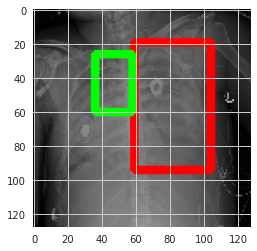

In [149]:
#Predict on Test Dataset
image_num = np.random.randint(0, test_final.shape[0])
predict_and_draw(image_num, test_final)